## Financial Dataset: FR - Y 9C

### Import Libraries:

In [1]:
import os ## System Library
import pandas as pd
import numpy as np
import graphviz
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import rc
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

### Read and combine the txt files:

In [2]:
# Path to the folder containing the text files
folder_path = r"D:\Boot Camp\Project Federal Reserve\Financial Data Download 2004-2024"

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] ## List Comprehension

# Initialize an empty list to store DataFrames
dataframes = []

# Read each file and append the DataFrame to the list
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='^', header=0, engine='python', encoding='latin1', on_bad_lines='skip')
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,RSSD9001,RSSD9999,RSSD9007,RSSD9008,RSSD9132,RSSD9032,RSSD9146,BHBC3368,BHBC3402,BHBC3516,...,BHCANC99,BHCKFT42,BHCKFT43,BHCKFT44,BHSPFT42,BHSPFT43,BHSPFT44,BHSPMZ36,BHSPNK60,BHCKMG95
0,1020180,20040331,20020401,20040822,551111,9,11.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020201,20040331,20001028,20051230,551111,2,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020340,20040331,20040301,20040531,551111,7,29.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020395,20040331,20040211,20081230,551111,6,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1020582,20040331,19980101,20060228,551111,7,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
combined_df.shape

(243757, 3099)

### Subset of Columns:

In [4]:
smalldf = combined_df[['RSSD9001', 'RSSD9007', 'RSSD9017', 'RSSD9032', 'RSSD9146', 'RSSD9999', 'BHCK2170', 'BHCK4107', 'BHCK4073', 'BHCK4079', 'BHCK4093']]
smalldf.head()

,RSSD9001,RSSD9007,RSSD9017,RSSD9032,RSSD9146,RSSD9999,BHCK2170,BHCK4107,BHCK4073,BHCK4079,BHCK4093
0,1020180,20020401,BREMER FINANCIAL CORPORATION,9,11.0,20040331,5721282.0,68233.0,21389.0,17200.0,41353.0
1,1020201,20001028,HSBC USA INC.,2,1.0,20040331,102501934.0,883035.0,228313.0,287858.0,489393.0
2,1020340,20040301,"HARRIS BANKCORP, INC.",7,29.0,20040331,32344528.0,276513.0,73178.0,122248.0,221779.0
3,1020395,20040211,SOUTHERN NATIONAL CORPORATION,6,1.0,20040331,217529.0,2980.0,1152.0,310.0,1128.0
4,1020582,19980101,"WCN BANCORP, INC.",7,1.0,20040331,240470.0,2692.0,677.0,398.0,1204.0


In [5]:
name_dict = {'RSSD9001':'RSSD ID',
             'RSSD9007':'Start Date',
             'RSSD9008':'End Date',
             'RSSD9017':'Firm Legal Name',
             'RSSD9032':'FR District Code',
             'RSSD9146':'Bank Count',
             'RSSD9999':'Reporting Date',
             'BHCK2170':'Total Assets', 
             'BHCK4073':'Interest Expense',
             'BHCK4107':'Interest Income Year-to-Date',
             'BHCK4079':'Non-Interest Income Year-to-Date',
             'BHCK4093':'Non-Interest Expense'}
smalldf = smalldf.rename(columns = name_dict).sort_values(by = ['RSSD ID'])
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense
0,1020180,20020401,BREMER FINANCIAL CORPORATION,9,11.0,20040331,5721282.0,68233.0,21389.0,17200.0,41353.0
207937,1020180,20151231,BREMER FINANCIAL CORPORATION,9,1.0,20200331,13266052.0,124069.0,23679.0,31259.0,82898.0
27847,1020180,20051231,BREMER FINANCIAL CORPORATION,9,9.0,20051231,6555895.0,362347.0,134831.0,79871.0,184491.0
203701,1020180,20151231,BREMER FINANCIAL CORPORATION,9,1.0,20191231,13168902.0,506492.0,116037.0,127532.0,320191.0
203273,1020180,20151231,BREMER FINANCIAL CORPORATION,9,1.0,20190930,13114874.0,378705.0,88676.0,88879.0,235196.0


In [6]:
smalldf.shape

(243757, 11)

In [7]:
smalldf = smalldf.dropna(subset = ['Total Assets'])
smalldf.sort_values(by = ['Total Assets'])

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense
151792,1247334,20141231,CAPITOL BANCORP LTD.,7,1.0,20141231,3.610000e+02,0.0,-33678.0,414689.0,2245.0
148920,1247334,20140601,CAPITOL BANCORP LTD.,7,1.0,20140930,3.860000e+02,0.0,-33678.0,414687.0,2225.0
145262,1247334,20140601,CAPITOL BANCORP LTD.,7,1.0,20140630,1.224000e+03,0.0,-33678.0,414687.0,1399.0
142322,1247334,20140101,CAPITOL BANCORP LTD.,7,1.0,20140331,1.948000e+03,0.0,-33679.0,414672.0,710.0
115270,2856014,20120101,"LEADERS GROUP, INC., THE",7,1.0,20120331,7.071000e+03,4.0,182.0,253.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
235174,1039502,20190519,JPMORGAN CHASE & CO.,2,2.0,20230630,3.868240e+09,78807000.0,36158000.0,39185000.0,41260000.0
239510,1039502,20190519,JPMORGAN CHASE & CO.,2,2.0,20231231,3.875393e+09,171020000.0,81321000.0,72286000.0,87705000.0
239041,1039502,20190519,JPMORGAN CHASE & CO.,2,2.0,20230930,3.898333e+09,123511000.0,57988000.0,56666000.0,62958000.0
225971,1039502,20190519,JPMORGAN CHASE & CO.,2,2.0,20220331,3.954687e+09,15547000.0,1624000.0,16836000.0,19024000.0


In [8]:
smalldf.isna().sum()

RSSD ID                                0
Start Date                             0
Firm Legal Name                        0
FR District Code                       0
Bank Count                          2989
Reporting Date                         0
Total Assets                           0
Interest Income Year-to-Date           0
Interest Expense                       3
Non-Interest Income Year-to-Date      29
Non-Interest Expense                  29
dtype: int64

### Change Date Format:

In [9]:
smalldf['Reporting Date'] = pd.to_datetime(smalldf['Reporting Date'].astype(str), utc=True)
smalldf['Start Date'] = pd.to_datetime(smalldf['Start Date'].astype(str), utc=True)
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense
0,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,21389.0,17200.0,41353.0
207937,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2020-03-31 00:00:00+00:00,13266052.0,124069.0,23679.0,31259.0,82898.0
27847,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2005-12-31 00:00:00+00:00,6555895.0,362347.0,134831.0,79871.0,184491.0
203701,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-12-31 00:00:00+00:00,13168902.0,506492.0,116037.0,127532.0,320191.0
203273,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-09-30 00:00:00+00:00,13114874.0,378705.0,88676.0,88879.0,235196.0


### Define Quarters and Year:

In [10]:
smalldf['Quarter'] = smalldf['Reporting Date'].dt.quarter
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter
0,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,21389.0,17200.0,41353.0,1
207937,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2020-03-31 00:00:00+00:00,13266052.0,124069.0,23679.0,31259.0,82898.0,1
27847,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2005-12-31 00:00:00+00:00,6555895.0,362347.0,134831.0,79871.0,184491.0,4
203701,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-12-31 00:00:00+00:00,13168902.0,506492.0,116037.0,127532.0,320191.0,4
203273,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-09-30 00:00:00+00:00,13114874.0,378705.0,88676.0,88879.0,235196.0,3


In [11]:
smalldf['Year'] = smalldf['Reporting Date'].dt.year
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year
0,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,21389.0,17200.0,41353.0,1,2004
207937,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2020-03-31 00:00:00+00:00,13266052.0,124069.0,23679.0,31259.0,82898.0,1,2020
27847,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2005-12-31 00:00:00+00:00,6555895.0,362347.0,134831.0,79871.0,184491.0,4,2005
203701,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-12-31 00:00:00+00:00,13168902.0,506492.0,116037.0,127532.0,320191.0,4,2019
203273,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-09-30 00:00:00+00:00,13114874.0,378705.0,88676.0,88879.0,235196.0,3,2019


### Quarterization:

In [12]:
def f(val):
    global last_val
    new_val = val - last_val
    last_val = val
    return new_val

In [13]:
# Quarterization for Interest Income year-to-date

new_dfs = []
for i in smalldf['RSSD ID'].unique():
  new_df_i = smalldf.loc[smalldf['RSSD ID']==i,:]
  for j in smalldf['Year'].unique():
    new_df_i_j = new_df_i.loc[smalldf['Year']==j,:]
    new_df_i_j = new_df_i_j.sort_values('Quarter')
    last_val = 0
    new_df_i_j['Interest Income per Quarter'] = new_df_i_j['Interest Income Year-to-Date'].apply(f)
    new_dfs.append(new_df_i_j)

Quarterized_dfs = pd.concat(new_dfs, ignore_index=True)
Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year,Interest Income per Quarter
0,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,21389.0,17200.0,41353.0,1,2004,68233.0
1,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30 00:00:00+00:00,5870480.0,138086.0,42634.0,35351.0,84535.0,2,2004,69853.0
2,1020180,2004-08-23 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30 00:00:00+00:00,5963700.0,212489.0,65175.0,53242.0,127342.0,3,2004,74403.0
3,1020180,2004-08-23 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31 00:00:00+00:00,6141519.0,291916.0,88839.0,72570.0,172413.0,4,2004,79427.0
4,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2020-03-31 00:00:00+00:00,13266052.0,124069.0,23679.0,31259.0,82898.0,1,2020,124069.0


### Normalization:

In [14]:
Quarterized_dfs['Normalized Interest Income per Quarter'] = Quarterized_dfs['Interest Income per Quarter']/Quarterized_dfs['Total Assets']
Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year,Interest Income per Quarter,Normalized Interest Income per Quarter
0,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,21389.0,17200.0,41353.0,1,2004,68233.0,0.011926
1,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30 00:00:00+00:00,5870480.0,138086.0,42634.0,35351.0,84535.0,2,2004,69853.0,0.011899
2,1020180,2004-08-23 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30 00:00:00+00:00,5963700.0,212489.0,65175.0,53242.0,127342.0,3,2004,74403.0,0.012476
3,1020180,2004-08-23 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31 00:00:00+00:00,6141519.0,291916.0,88839.0,72570.0,172413.0,4,2004,79427.0,0.012933
4,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2020-03-31 00:00:00+00:00,13266052.0,124069.0,23679.0,31259.0,82898.0,1,2020,124069.0,0.009352


## US Department of Treasury Dataset - Yield Curve Rates from 2004-24:

In [15]:
rates_df = pd.read_csv("D:\Boot Camp\Project Federal Reserve\yield-curve-rates-2004-2024.csv")
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,07/15/24,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,07/12/24,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,07/11/24,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,07/10/24,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,07/09/24,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [16]:
rates_df.shape

(5139, 14)

In [17]:
# Changing Date to Date-time Format
rates_df['Date'] = pd.to_datetime(rates_df['Date'].astype(str), format='%m/%d/%y', utc=True)#.dt.date.astype('datetime64')
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-07-15 00:00:00+00:00,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,2024-07-12 00:00:00+00:00,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,2024-07-11 00:00:00+00:00,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,2024-07-10 00:00:00+00:00,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,2024-07-09 00:00:00+00:00,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [18]:
# Giving the Year and Quarter each entry
rates_df['Year'] = rates_df['Date'].dt.year
rates_df['Quarter'] = rates_df['Date'].dt.quarter
rates_df.sort_values('Date').head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
5138,2004-01-02 00:00:00+00:00,0.88,NaN,0.93,NaN,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,NaN,2004,1
5137,2004-01-05 00:00:00+00:00,0.88,NaN,0.91,NaN,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,NaN,2004,1
5136,2004-01-06 00:00:00+00:00,0.88,NaN,0.91,NaN,1.03,1.30,1.84,2.38,3.26,3.80,4.29,5.13,NaN,2004,1
5135,2004-01-07 00:00:00+00:00,0.88,NaN,0.91,NaN,1.02,1.29,1.84,2.36,3.25,3.76,4.27,5.11,NaN,2004,1
5134,2004-01-08 00:00:00+00:00,0.87,NaN,0.88,NaN,1.01,1.29,1.85,2.37,3.24,3.76,4.27,5.12,NaN,2004,1


In [19]:
rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5139 entries, 0 to 5138
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   Date     5139 non-null   datetime64[ns, UTC]
 1   1 Mo     5138 non-null   float64            
 2   2 Mo     1436 non-null   float64            
 3   3 Mo     5135 non-null   float64            
 4   4 Mo     434 non-null    float64            
 5   6 Mo     5138 non-null   float64            
 6   1 Yr     5138 non-null   float64            
 7   2 Yr     5138 non-null   float64            
 8   3 Yr     5138 non-null   float64            
 9   5 Yr     5138 non-null   float64            
 10  7 Yr     5138 non-null   float64            
 11  10 Yr    5138 non-null   float64            
 12  20 Yr    5138 non-null   float64            
 13  30 Yr    4612 non-null   float64            
 14  Year     5139 non-null   int64              
 15  Quarter  5139 non-null   int64        

In [20]:
finalrates = rates_df.groupby(['Year', 'Quarter']).mean().reset_index()
finalrates.head(8)

C:\Users\huang\AppData\Local\Temp\ipykernel_25824\3437818379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  finalrates = rates_df.groupby(['Year', 'Quarter']).mean().reset_index()


,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2004,1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN
1,2004,2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN
2,2004,3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN
3,2004,4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN
4,2005,1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN
5,2005,2,2.709687,NaN,2.926719,NaN,3.179688,3.337344,3.645938,3.732344,3.872969,3.984688,4.158594,4.548750,NaN
6,2005,3,3.228594,NaN,3.438281,NaN,3.707031,3.791094,3.957969,3.989219,4.039375,4.108437,4.215156,4.507656,NaN
7,2005,4,3.702131,NaN,3.913607,NaN,4.250492,4.288525,4.364590,4.372295,4.391148,4.425738,4.488197,4.767541,NaN


In [21]:
def get_quarter_end(row):
    period = pd.Period(row['Year'].astype(int).astype(str) + 'Q' + row['Quarter'].astype(int).astype(str))
    return period.end_time

finalrates['Date'] = finalrates.apply(get_quarter_end, axis=1)
finalrates.head(8)

,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Date
0,2004,1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN,2004-03-31 23:59:59.999999999
1,2004,2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN,2004-06-30 23:59:59.999999999
2,2004,3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN,2004-09-30 23:59:59.999999999
3,2004,4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN,2004-12-31 23:59:59.999999999
4,2005,1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN,2005-03-31 23:59:59.999999999
5,2005,2,2.709687,NaN,2.926719,NaN,3.179688,3.337344,3.645938,3.732344,3.872969,3.984688,4.158594,4.548750,NaN,2005-06-30 23:59:59.999999999
6,2005,3,3.228594,NaN,3.438281,NaN,3.707031,3.791094,3.957969,3.989219,4.039375,4.108437,4.215156,4.507656,NaN,2005-09-30 23:59:59.999999999
7,2005,4,3.702131,NaN,3.913607,NaN,4.250492,4.288525,4.364590,4.372295,4.391148,4.425738,4.488197,4.767541,NaN,2005-12-31 23:59:59.999999999


In [22]:
finalrates['Date'] = finalrates['Date'].dt.date

In [23]:
finalrates.head(8)

,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Date
0,2004,1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN,2004-03-31
1,2004,2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN,2004-06-30
2,2004,3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN,2004-09-30
3,2004,4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN,2004-12-31
4,2005,1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN,2005-03-31
5,2005,2,2.709687,NaN,2.926719,NaN,3.179688,3.337344,3.645938,3.732344,3.872969,3.984688,4.158594,4.548750,NaN,2005-06-30
6,2005,3,3.228594,NaN,3.438281,NaN,3.707031,3.791094,3.957969,3.989219,4.039375,4.108437,4.215156,4.507656,NaN,2005-09-30
7,2005,4,3.702131,NaN,3.913607,NaN,4.250492,4.288525,4.364590,4.372295,4.391148,4.425738,4.488197,4.767541,NaN,2005-12-31


In [24]:
finalrates.shape

(83, 16)

### Daily Treasury Curve:

The importance of different Treasury rates can depend on the context and the financial instruments or decisions involved. However, some Treasury rates are generally considered more significant due to their broader economic implications and their use as benchmarks:

1. **10-Year Treasury Yield:**

-  Significance: Often regarded as a key indicator of investor sentiment and economic health. It's widely used as a benchmark for mortgage rates and other long-term loans.
-  Impact: Movements in the 10-year yield can influence borrowing costs for consumers and businesses, affecting spending and investment decisions.

2. **2-Year Treasury Yield:**

-  Significance: Closely watched as a gauge of Federal Reserve monetary policy expectations. Changes in the 2-year yield can reflect market expectations for future interest rate movements.
-  Impact: It's often used to understand short-term economic outlooks and the stance of monetary policy.

3. **30-Year Treasury Yield:**

-  Significance: Important for long-term investments and planning, such as retirement funds and insurance companies. It reflects long-term economic growth expectations and inflation.
-  Impact: Affects the pricing of long-term loans, mortgages, and other financial products.

4. **5-Year Treasury Yield:**

-  Significance: A middle ground between short-term and long-term rates, providing insights into medium-term economic conditions and expectations.
-  Impact: Influences intermediate-term loans and financing.

5. **3-Month Treasury Bill Rate:**

- Significance: Viewed as a safe haven and a benchmark for short-term interest rates. It's often used in calculating discount rates and as a reference for money market instruments.
- Impact: Reflects liquidity conditions and short-term interest rate expectations.

### Key Points of Interest:

-  **Yield Curve:** The relationship between short-term and long-term Treasury yields, which can signal economic conditions. A normal upward-sloping yield curve indicates healthy economic growth, while an inverted yield curve can signal a potential recession.

- **Inflation Expectations:** Treasury rates can provide insights into market expectations for inflation, with higher rates often indicating higher inflation expectations.

- **Federal Reserve Policy:** The Fed's actions, such as rate hikes or cuts, directly influence short-term Treasury yields and can also affect longer-term yields through expectations and market reactions.

Each Treasury rate serves a different purpose and offers unique insights into various aspects of the economy and financial markets. Understanding the context and the specific financial decision at hand is crucial in determining which Treasury rate is most important.

### Visualization of all Rates presented in the Dataset over Time:

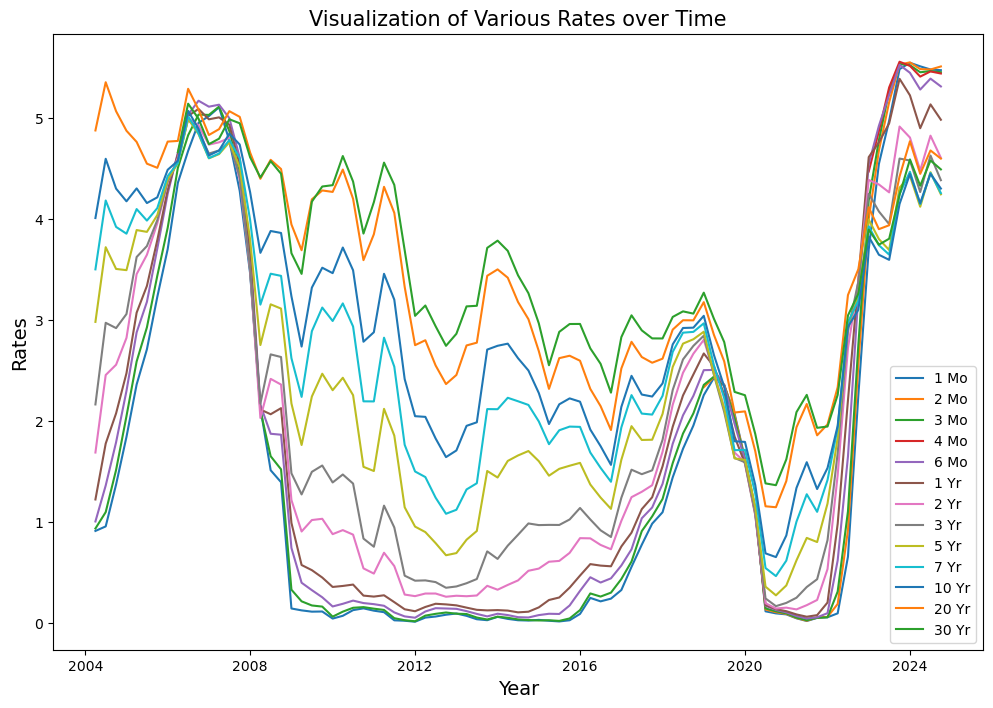

In [25]:
# Adjusting the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Creating the plot
for col in ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']:
    ax.plot(finalrates['Date'], finalrates[col], label=col)

# Adding a plot title and customizing its font size
ax.set_title('Visualization of Various Rates over Time', fontsize=15)

# Adding axis labels and customizing their font size
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Rates', fontsize=14)

# Making a legend for the colors
ax.legend();

**Interpretation:** 

If the graph shows that short-term rates (like 1-month and 2-month rates) have been rising steadily while long-term rates (like 10-year and 30-year rates) remain relatively flat, it might suggest an economic scenario where the central bank is increasing rates to combat inflation, but the long-term outlook remains uncertain.

Conversely, if all rates are rising together, it could indicate overall economic growth and increased expectations of future inflation.

### Visualization of a subset of Rates over Time:

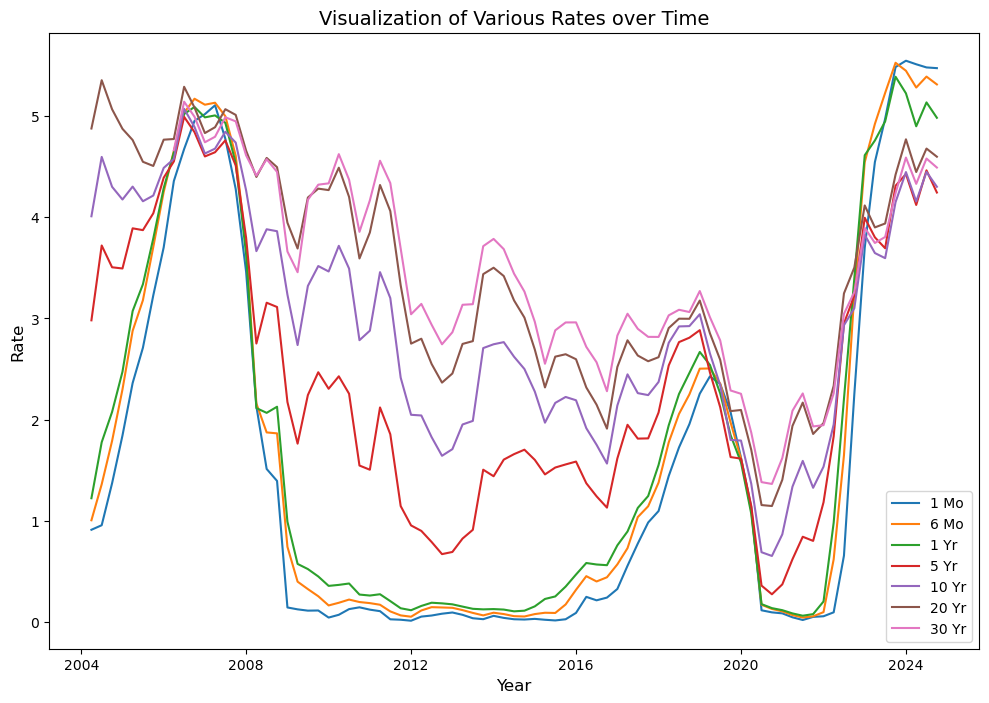

In [26]:
# Making a smaller plot with fewer rates included

# Adjusting the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Creating the plot
for col in ['1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr']:
    ax.plot(finalrates['Date'], finalrates[col], label=col)

# Adding a plot title and customizing its font size
ax.set_title('Visualization of Various Rates over Time', fontsize=14)

# Adding axis labels and customizing their font size
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate', fontsize=12)

# Making a legend for the colors
ax.legend();

### Highlighting Periods where Short Term Interest Rates are Bigger than Long Term:

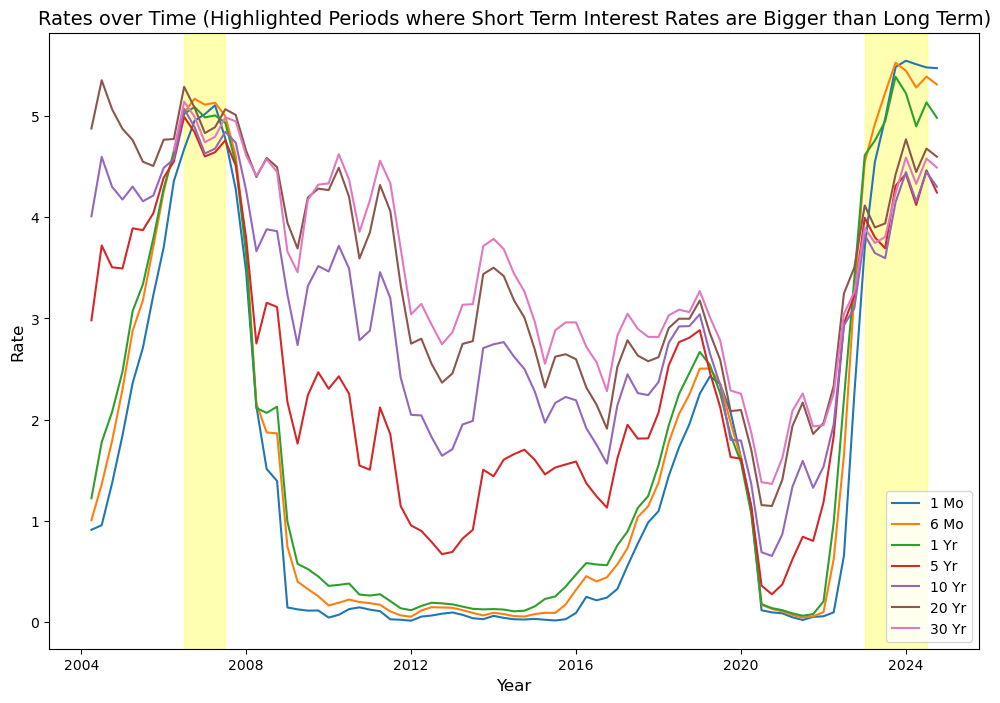

In [27]:
# Adjusting the figure size
fig = plt.subplots(figsize=(12, 8))

# Creating plot
for col in ['1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[col])

# Adding a plot title and customizing its font size
plt.title('Rates over Time (Highlighted Periods where Short Term Interest Rates are Bigger than Long Term)', fontsize=14)

# Adding axis labels and customizing their font size
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate', fontsize=12)

# Make a legend for colors
plt.gca().legend(('1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr'), loc='lower right') 

# Highlighting the time period from 2006-6-30 to 2007-06-30 
plt.axvspan(datetime(2006, 6, 30), datetime(2007, 6, 30), color='yellow', alpha=0.3)

# Highlighting the time period from 2022-12-31 to 2024-07-1 
plt.axvspan(datetime(2022, 12, 31), datetime(2024, 7, 1), color='yellow', alpha=0.3);

-  **Highlighting Specific Periods:** The yellow highlighted areas indicate specific time periods where short-term interest rates were greater than long-term interest rates. This can suggest periods of economic stress or unusual market conditions, such as during financial crises or major economic events.
-  **Yield Curve Inversion:** Typically, long-term rates are higher than short-term rates. When this relationship reverses, it can signal an inverted yield curve, which is often seen as a predictor of economic recessions.

### Function to modify the format of dates:

In [28]:
def chain_date(date_str):
    for fmt in ('%m/%d/%Y', '%m/%d/%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

In [29]:
rates_df['Date'] = rates_df['Date'].apply(chain_date)
copy_df = rates_df.copy()
copy_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
0,2024-07-15 00:00:00+00:00,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46,2024,3
1,2024-07-12 00:00:00+00:00,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39,2024,3
2,2024-07-11 00:00:00+00:00,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41,2024,3
3,2024-07-10 00:00:00+00:00,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47,2024,3
4,2024-07-09 00:00:00+00:00,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49,2024,3


### Function to assign quarters:

In [30]:
def assign_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

In [31]:
# Asisign the quarters in a new column
copy_df['Quarter'] = copy_df['Date'].apply(assign_quarter)
copy_df['Year'] = copy_df['Date'].dt.year

In [32]:
# Group by quarter and calculate the average of all columns except 'Date'
quarterly_averages = copy_df.groupby(['Year', 'Quarter']).mean(numeric_only=True)
quarterly_averages.head(8)

1 Mo  2 Mo      3 Mo  4 Mo      6 Mo      1 Yr      2 Yr  \
Year Quarter                                                                 
2004 Q1       0.909677   NaN  0.933710   NaN  1.003548  1.221452  1.686613   
     Q2       0.954516   NaN  1.096129   NaN  1.359677  1.775484  2.454677   
     Q3       1.370000   NaN  1.513906   NaN  1.788437  2.075000  2.556563   
     Q4       1.841774   NaN  2.047419   NaN  2.297581  2.472742  2.822419   
2005 Q1       2.360984   NaN  2.589180   NaN  2.876885  3.072459  3.454918   
     Q2       2.709687   NaN  2.926719   NaN  3.179688  3.337344  3.645938   
     Q3       3.228594   NaN  3.438281   NaN  3.707031  3.791094  3.957969   
     Q4       3.702131   NaN  3.913607   NaN  4.250492  4.288525  4.364590   

                  3 Yr      5 Yr      7 Yr     10 Yr     20 Yr  30 Yr  
Year Quarter                                                           
2004 Q1       2.163065  2.980968  3.501452  4.010000  4.877903    NaN  
     Q2       2.971935  3.720968  4.183871  4.597097  5.355645    NaN  
     Q3       2.919531  3.505625  3.922188  4.301406  5.068281    NaN  
     Q4       3.058871  3.493710  3.855000  4.175806  4.874839    NaN  
2005 Q1       3.623934  3.890820  4.098852  4.303607  4.764098    NaN  
     Q2       3.732344  3.872969  3.984688  4.158594  4.548750    NaN  
     Q3       3.989219  4.039375  4.108437  4.215156  4.507656    NaN  
     Q4       4.372295  4.391148  4.425738  4.488197  4.767541    NaN

### Possible Spreads:

In [33]:
columns_to_consider = quarterly_averages.columns[2:]
columns_to_consider

Index(['3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '20 Yr', '30 Yr'],
      dtype='object')

In [34]:
column_pairs = list(itertools.combinations(columns_to_consider, 2)) ## Gives possible combinations of Spread

In [35]:
# Data frame to store the spreads
spreads_df = pd.DataFrame()

for (col1, col2) in column_pairs:
    spread_col_name = f"{col2}-{col1}_spread"
    spreads_df[spread_col_name] = quarterly_averages[col2] - quarterly_averages[col1]
        
# Add the Year-Quarter columns: Must have 80 columns in total
result_df = pd.concat([quarterly_averages.iloc[:, :2], spreads_df], axis=1)

result_df.head()

1 Mo  2 Mo  4 Mo-3 Mo_spread  6 Mo-3 Mo_spread  \
Year Quarter                                                       
2004 Q1       0.909677   NaN               NaN          0.069839   
     Q2       0.954516   NaN               NaN          0.263548   
     Q3       1.370000   NaN               NaN          0.274531   
     Q4       1.841774   NaN               NaN          0.250161   
2005 Q1       2.360984   NaN               NaN          0.287705   

              1 Yr-3 Mo_spread  2 Yr-3 Mo_spread  3 Yr-3 Mo_spread  \
Year Quarter                                                         
2004 Q1               0.287742          0.752903          1.229355   
     Q2               0.679355          1.358548          1.875806   
     Q3               0.561094          1.042656          1.405625   
     Q4               0.425323          0.775000          1.011452   
2005 Q1               0.483279          0.865738          1.034754   

              5 Yr-3 Mo_spread  7 Yr-3 Mo_spread  10 Yr-3 Mo_spread  ...  \
Year Quarter                                                         ...   
2004 Q1               2.047258          2.567742           3.076290  ...   
     Q2               2.624839          3.087742           3.500968  ...   
     Q3               1.991719          2.408281           2.787500  ...   
     Q4               1.446290          1.807581           2.128387  ...   
2005 Q1               1.301639          1.509672           1.714426  ...   

              7 Yr-5 Yr_spread  10 Yr-5 Yr_spread  20 Yr-5 Yr_spread  \
Year Quarter                                                           
2004 Q1               0.520484           1.029032           1.896935   
     Q2               0.462903           0.876129           1.634677   
     Q3               0.416562           0.795781           1.562656   
     Q4               0.361290           0.682097           1.381129   
2005 Q1               0.208033           0.412787           0.873279   

              30 Yr-5 Yr_spread  10 Yr-7 Yr_spread  20 Yr-7 Yr_spread  \
Year Quarter                                                            
2004 Q1                     NaN           0.508548           1.376452   
     Q2                     NaN           0.413226           1.171774   
     Q3                     NaN           0.379219           1.146094   
     Q4                     NaN           0.320806           1.019839   
2005 Q1                     NaN           0.204754           0.665246   

              30 Yr-7 Yr_spread  20 Yr-10 Yr_spread  30 Yr-10 Yr_spread  \
Year Quarter                                                              
2004 Q1                     NaN            0.867903                 NaN   
     Q2                     NaN            0.758548                 NaN   
     Q3                     NaN            0.766875                 NaN   
     Q4                     NaN            0.699032                 NaN   
2005 Q1                     NaN            0.460492                 NaN   

              30 Yr-20 Yr_spread  
Year Quarter                      
2004 Q1                      NaN  
     Q2                      NaN  
     Q3                      NaN  
     Q4                      NaN  
2005 Q1                      NaN  

[5 rows x 57 columns]

In [36]:
result_df.shape

(83, 57)

### Visualization of 10Y-3M spread:

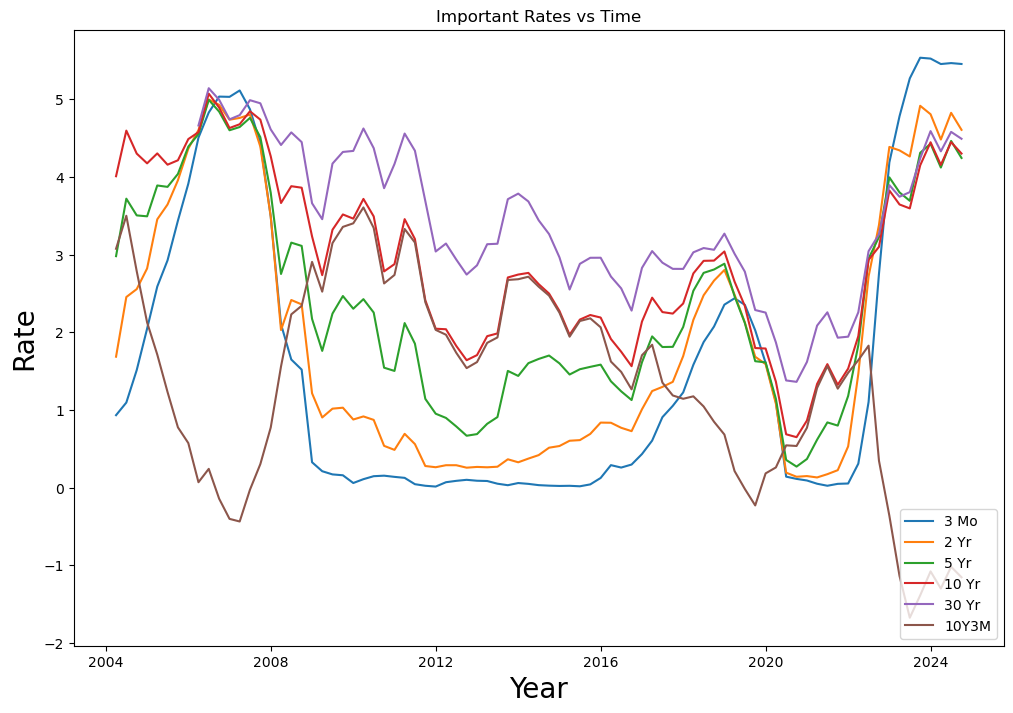

In [37]:
# Need a large figure
fic = plt.subplots(figsize=(12, 8))

# Plot fewer but more important rates
for rate in ['3 Mo', '2 Yr', '5 Yr', '10 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[rate])

# Plot 10-year minus 3-month rate
plt.plot(finalrates['Date'], finalrates['10 Yr'] - finalrates['3 Mo'])

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rate', fontsize = 20)
plt.title('Important Rates vs Time')

# Color the curves
plt.gca().legend(('3 Mo', '2 Yr', '5 Yr', '10 Yr', '30 Yr', '10Y3M'), loc = 'lower right');

**Interpretation:** If the 10Y3M line dips below zero (goes negative), this indicates that the 3-month rate is higher than the 10-year rate, suggesting an inverted yield curve. This scenario is typically watched closely by economists and financial analysts as a potential sign of upcoming economic downturns. The other lines show how short-term and long-term interest rates have varied, providing insight into monetary policy impacts and market expectations.

### Plot focusing on periods where the 10-year Treasury yield is less than the 3-month Treasury yield:

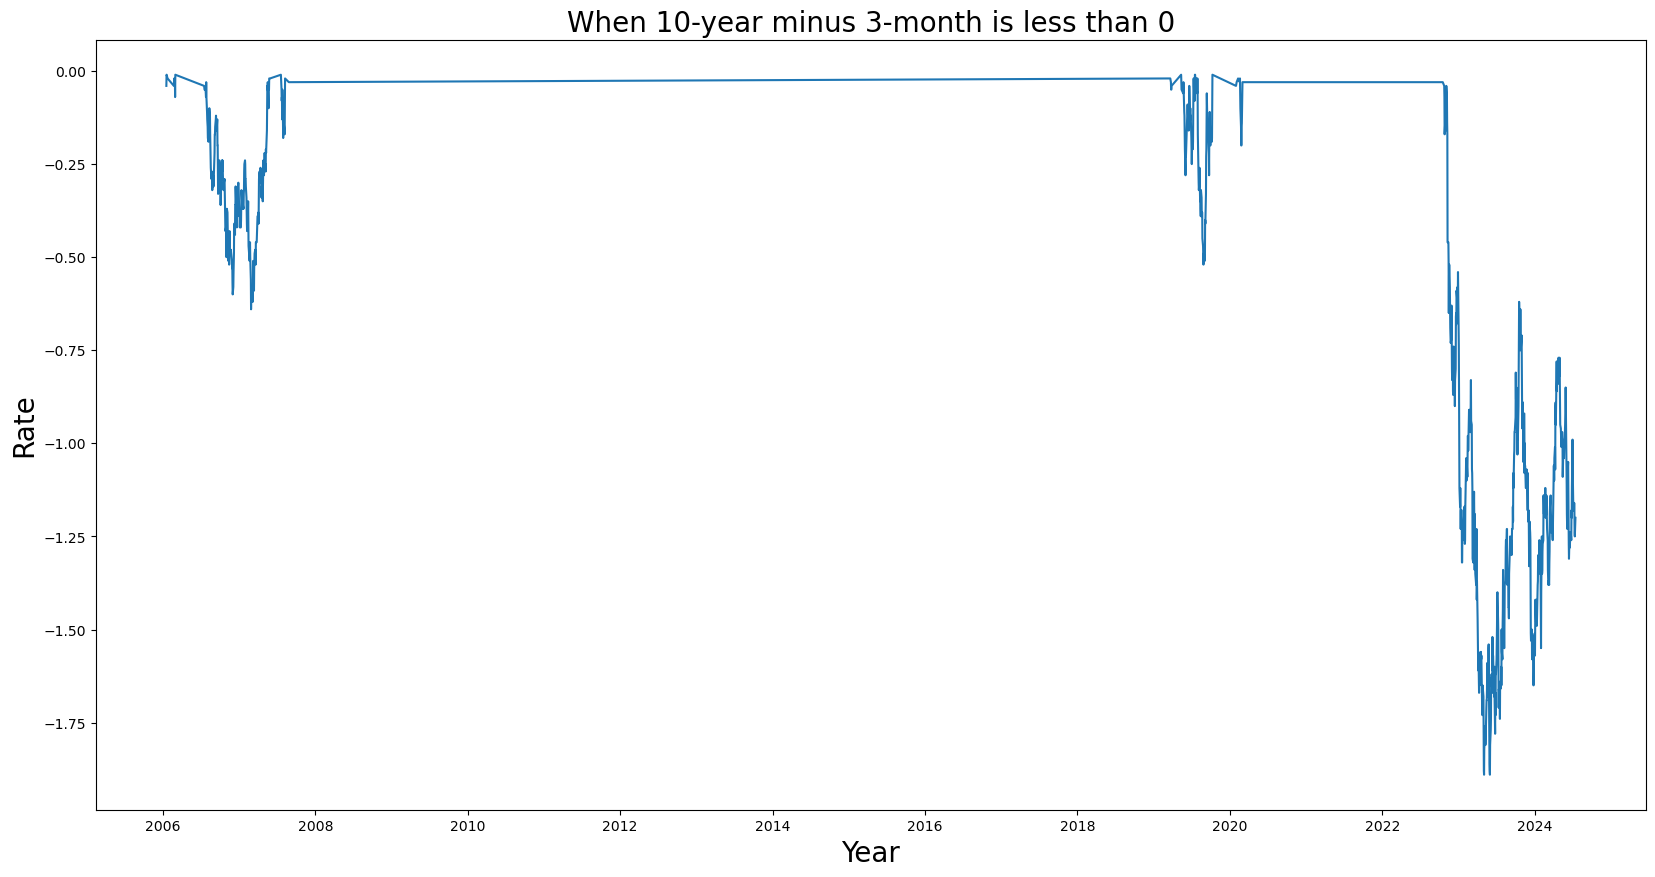

In [38]:
# Plot 10-year minus 3-month when 3-month > 10-year
filtered_rates = rates_df[rates_df['10 Yr'] < rates_df['3 Mo']]

# Need a large figure
fic = plt.subplots(figsize = (20,10))

plt.plot(filtered_rates['Date'], filtered_rates['10 Yr'] - filtered_rates['3 Mo'])
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rate', fontsize = 20)
plt.title('When 10-year minus 3-month is less than 0', fontsize = 20);

**Interpretation:** The plot generated will display the periods when the 10-year Treasury yield is lower than the 3-month Treasury yield, indicating instances where the yield curve may be inverted.

#### Observations on Treasury Rates:

-  Trend of All Treasury Rates are similar.

-  Trends clearly show the periods of 2008 financial crisis, covid pandemic, and post-pandemic era.

-  Longer-term treasury rate are usually more than shorter-term treasury rate. For example, 10-Year rate is usually greater than 3-month rate, except a period before 2008, and the post-pandemic era.

### Correlation Matrix:

In [39]:
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    ## figsize=(graphWidth, graphWidth): Sets the figure size based on the graphWidth parameter, making the plot square-shaped.
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k') 
    ## plt.matshow() displays the correlation matrix as a heatmap.
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize = 15)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 15)
    ## plt.gca() gets the current Axes instance.
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

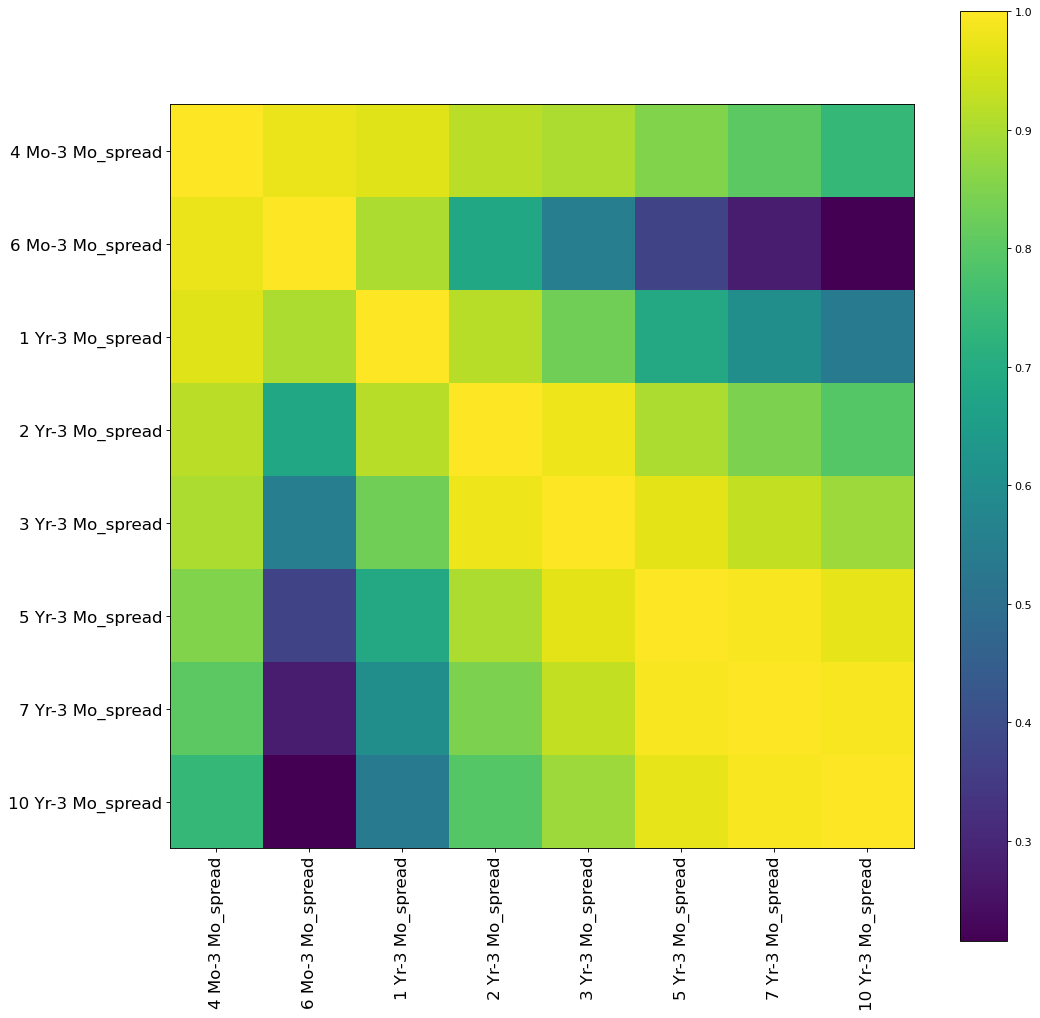

In [40]:
columns_to_consider = result_df.columns[2:10]
columns_to_include = [col for col in columns_to_consider]
df_selected = result_df[columns_to_include]
plotCorrelationMatrix(df_selected, 15)

### Scatter and Density Plots

In [41]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    # keep only numerical columns
    df = df.select_dtypes(include =[np.number]) 
    columnNames = list(df)
    df = df[columnNames]
    #Create the frames
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

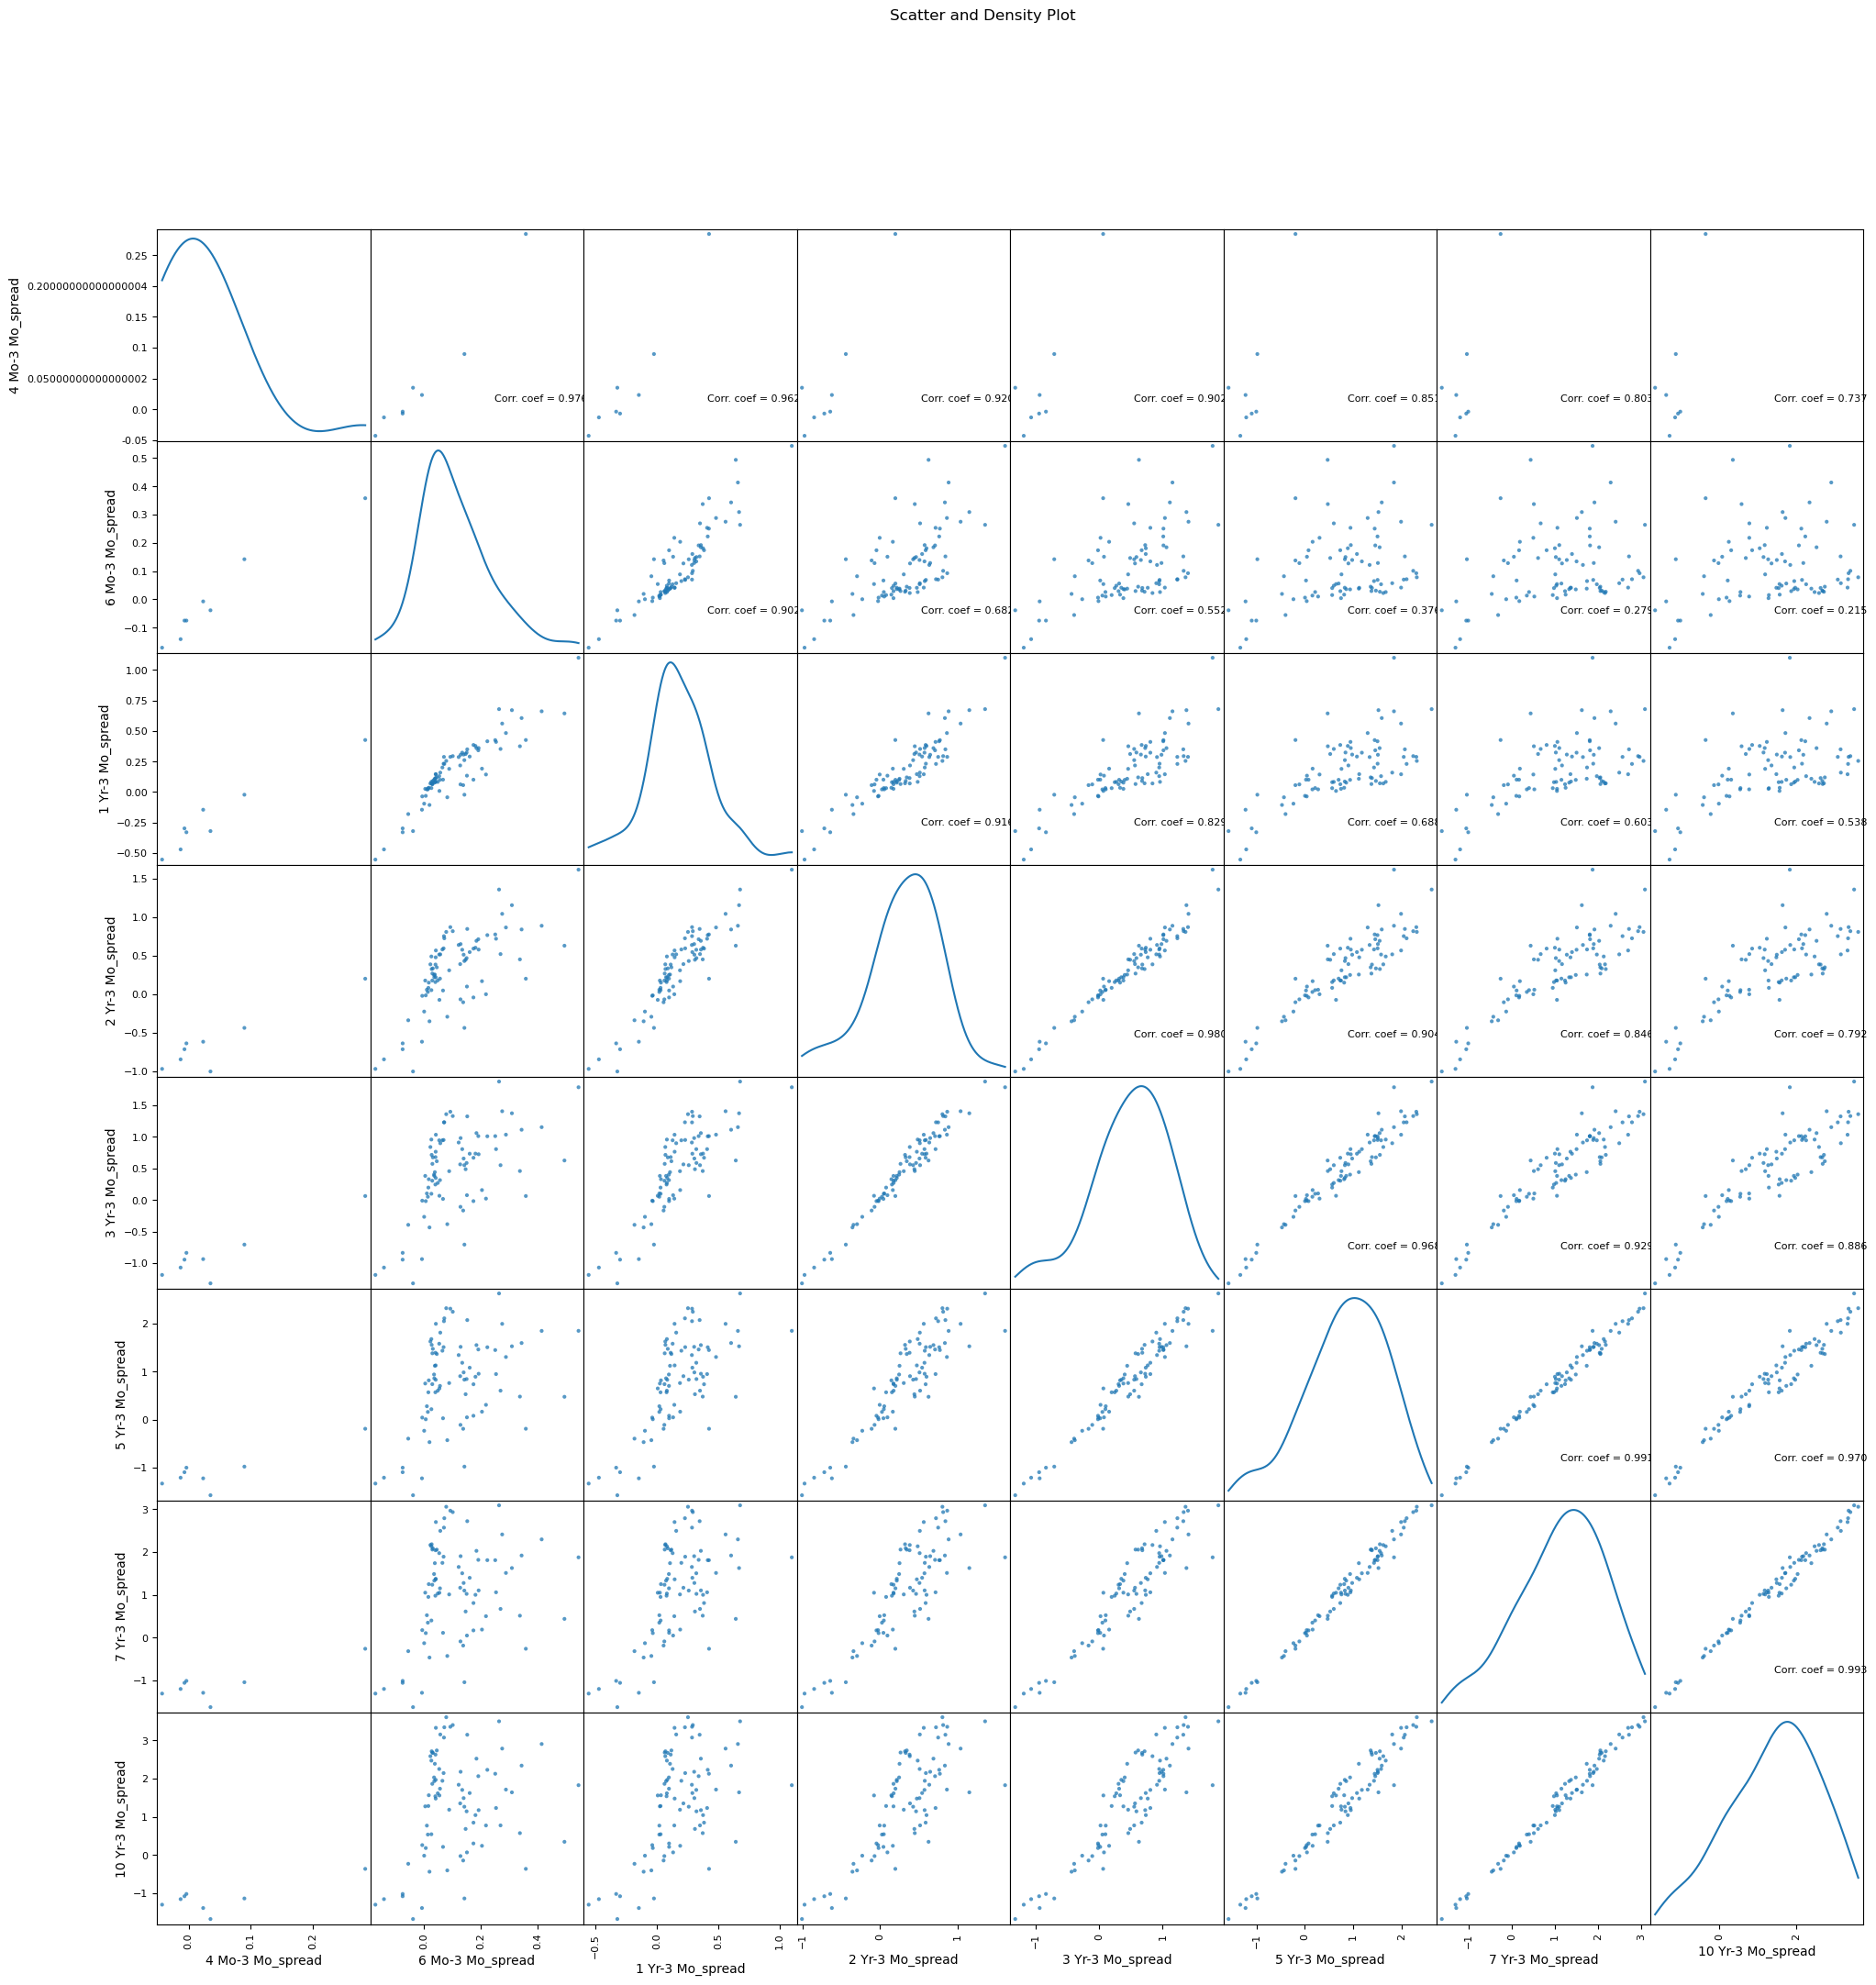

In [42]:
plotScatterMatrix(df_selected, 24, 8)

## GDP and Unemployment Dataset:

In [43]:
gdp_df = pd.read_csv(r"D:\Boot Camp\Project Federal Reserve\GDP.csv", parse_dates=True) ## GDP
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
print(gdp_df.shape)
gdp_df.head()

(309, 2)


,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [44]:
uner_df = pd.read_csv(r"D:\Boot Camp\Project Federal Reserve\UNRATE.csv") ## Unemployment Rate
uner_df['DATE'] = pd.to_datetime(uner_df['DATE'])
print(uner_df.shape)
uner_df.head()

(82, 2)


,DATE,UNRATE
0,2004-01-01,5.700000
1,2004-04-01,5.600000
2,2004-07-01,5.433333
3,2004-10-01,5.433333
4,2005-01-01,5.300000


# GDP growth data

In [45]:
gdp_growth = pd.read_csv(r"D:\Boot Camp\Project Federal Reserve\GDP_growth_2004-2024.csv")
gdp_growth.head()

,DATE,GDP growth
0,2004-01-01,2.3
1,2004-04-01,3.1
2,2004-07-01,3.8
3,2004-10-01,4.1
4,2005-01-01,4.5


In [46]:
gdp_growth.rename(columns = {'DATE': 'DATE', ' GDP growth': 'GDP growth'}, errors = 'raise')
list(gdp_growth.columns)

['DATE', ' GDP growth']

In [47]:
gdp_growth['DATE'] = pd.to_datetime(gdp_growth['DATE'])

In [48]:
df_gdp_uner = pd.merge(gdp_df,uner_df,on='DATE')
print(df_gdp_uner.shape)
df_gdp_uner.head()


(81, 3)


,DATE,GDP,UNRATE
0,2004-01-01,11923.447,5.700000
1,2004-04-01,12112.815,5.600000
2,2004-07-01,12305.307,5.433333
3,2004-10-01,12527.214,5.433333
4,2005-01-01,12767.286,5.300000


In [49]:
df_gdp_uner = pd.merge(gdp_growth, df_gdp_uner, on = 'DATE')
print(df_gdp_uner.shape)
df_gdp_uner.head()

(81, 4)


,DATE,GDP growth,GDP,UNRATE
0,2004-01-01,2.3,11923.447,5.700000
1,2004-04-01,3.1,12112.815,5.600000
2,2004-07-01,3.8,12305.307,5.433333
3,2004-10-01,4.1,12527.214,5.433333
4,2005-01-01,4.5,12767.286,5.300000


In [50]:
df_gdp_uner.rename(columns={'DATE': 'date'}, inplace=True)   

### Updating dates based on quarterly end dates and adjusting dates for December months: 

In [51]:
def update_quart_enddate_shift(df):
    # Define a dictionary to map the month to the new date
    quarter_end_dates = {1: (12, 31), 4: (3, 31), 7: (6, 30), 10: (9, 30)}

    # Apply the mapping to update the dates
    for month, (new_month, new_day) in quarter_end_dates.items():
        df.loc[df['date'].dt.month == month, 'date'] = df['date'].apply(
            lambda x: x.replace(month=new_month, day=new_day) if x.month == month else x
        )

    # offset the years by 1 for those whose month is december
    tmp_ids = df[df["date"].dt.month == 12].index
    df.loc[tmp_ids, "date"] = df.loc[tmp_ids, "date"] - pd.DateOffset(years=1)

    # drop the first row df_gdp_uner
    df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [52]:
df_gdp_uner =  update_quart_enddate_shift(df_gdp_uner)
df_gdp_uner.head()

,date,GDP growth,GDP,UNRATE
0,2004-03-31,3.1,12112.815,5.600000
1,2004-06-30,3.8,12305.307,5.433333
2,2004-09-30,4.1,12527.214,5.433333
3,2004-12-31,4.5,12767.286,5.300000
4,2005-03-31,2.0,12922.656,5.100000


In [53]:
# add a year column to df_gdp_uner
df_gdp_uner_copy = df_gdp_uner.copy()
df_gdp_uner_copy['Year'] = df_gdp_uner_copy['date'].dt.year
df_gdp_uner_copy.head()

,date,GDP growth,GDP,UNRATE,Year
0,2004-03-31,3.1,12112.815,5.600000,2004
1,2004-06-30,3.8,12305.307,5.433333,2004
2,2004-09-30,4.1,12527.214,5.433333,2004
3,2004-12-31,4.5,12767.286,5.300000,2004
4,2005-03-31,2.0,12922.656,5.100000,2005


In [54]:
df_gdp_uner_copy['Quarter'] = df_gdp_uner_copy['date'].apply(assign_quarter)
df_gdp_uner_copy.head()

,date,GDP growth,GDP,UNRATE,Year,Quarter
0,2004-03-31,3.1,12112.815,5.600000,2004,Q1
1,2004-06-30,3.8,12305.307,5.433333,2004,Q2
2,2004-09-30,4.1,12527.214,5.433333,2004,Q3
3,2004-12-31,4.5,12767.286,5.300000,2004,Q4
4,2005-03-31,2.0,12922.656,5.100000,2005,Q1


### Determine periods where GDP is decreasing:

In [55]:
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
gdp_df['Decrease'] = gdp_df['GDP'].diff().shift(-1) < 0
gdp_df.head()

,DATE,GDP,Decrease
0,1947-01-01,243.164,False
1,1947-04-01,245.968,False
2,1947-07-01,249.585,False
3,1947-10-01,259.745,False
4,1948-01-01,265.742,False


### Plot of GDP data over time:

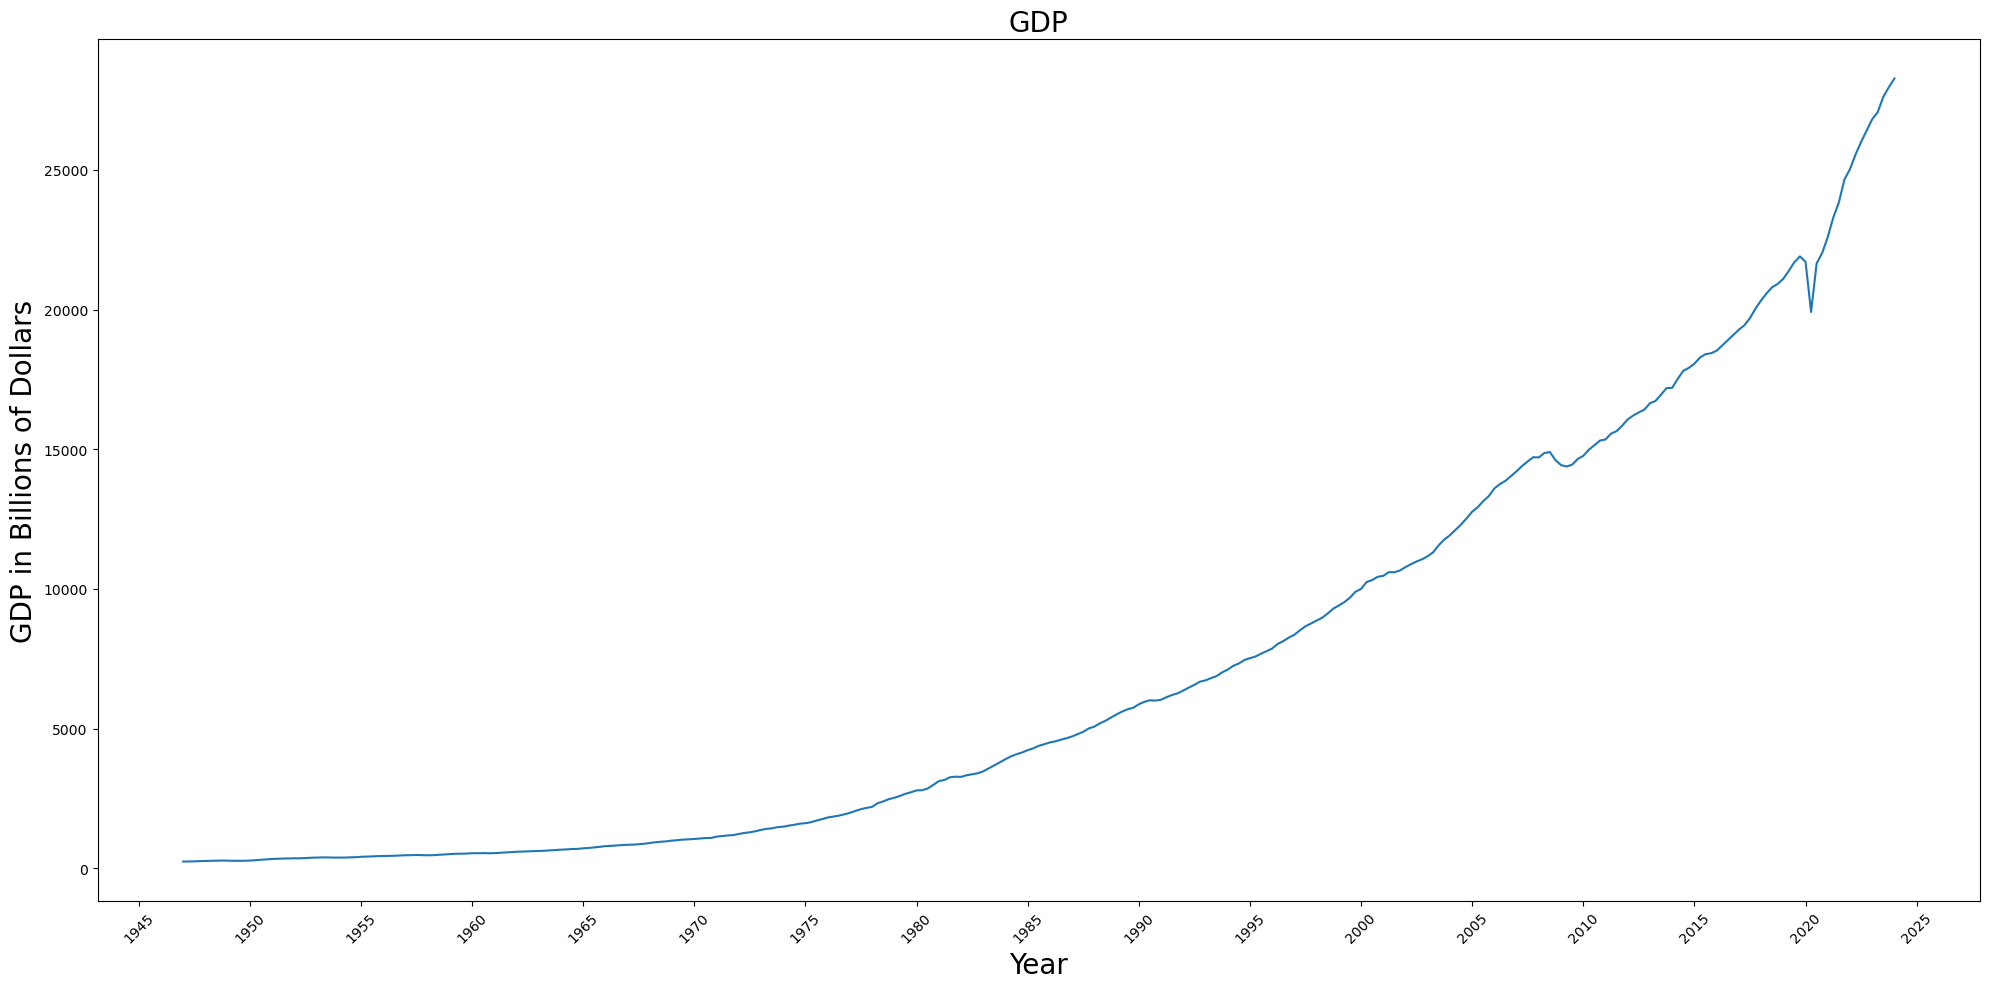

In [56]:
# Create a large figure
fic = plt.subplots(figsize=(20, 10))

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

# Plot the data
plt.plot(gdp_df['DATE'], gdp_df['GDP'])

# Label the axes and the title
plt.xlabel('Year', fontsize=20)
plt.ylabel('GDP in Billions of Dollars', fontsize=20)
plt.title('GDP', fontsize=20)

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### GDP from the year 2000 onwards:

In [57]:
gdp_after2000 = gdp_df[gdp_df['DATE'] >= '2000-01-01']
gdp_after2000.head()

,DATE,GDP,Decrease
212,2000-01-01,10002.179,False
213,2000-04-01,10247.720,False
214,2000-07-01,10318.165,False
215,2000-10-01,10435.744,False
216,2001-01-01,10470.231,False


### Visualizing GDP data after the year 2000, highlighting periods where GDP decreases:

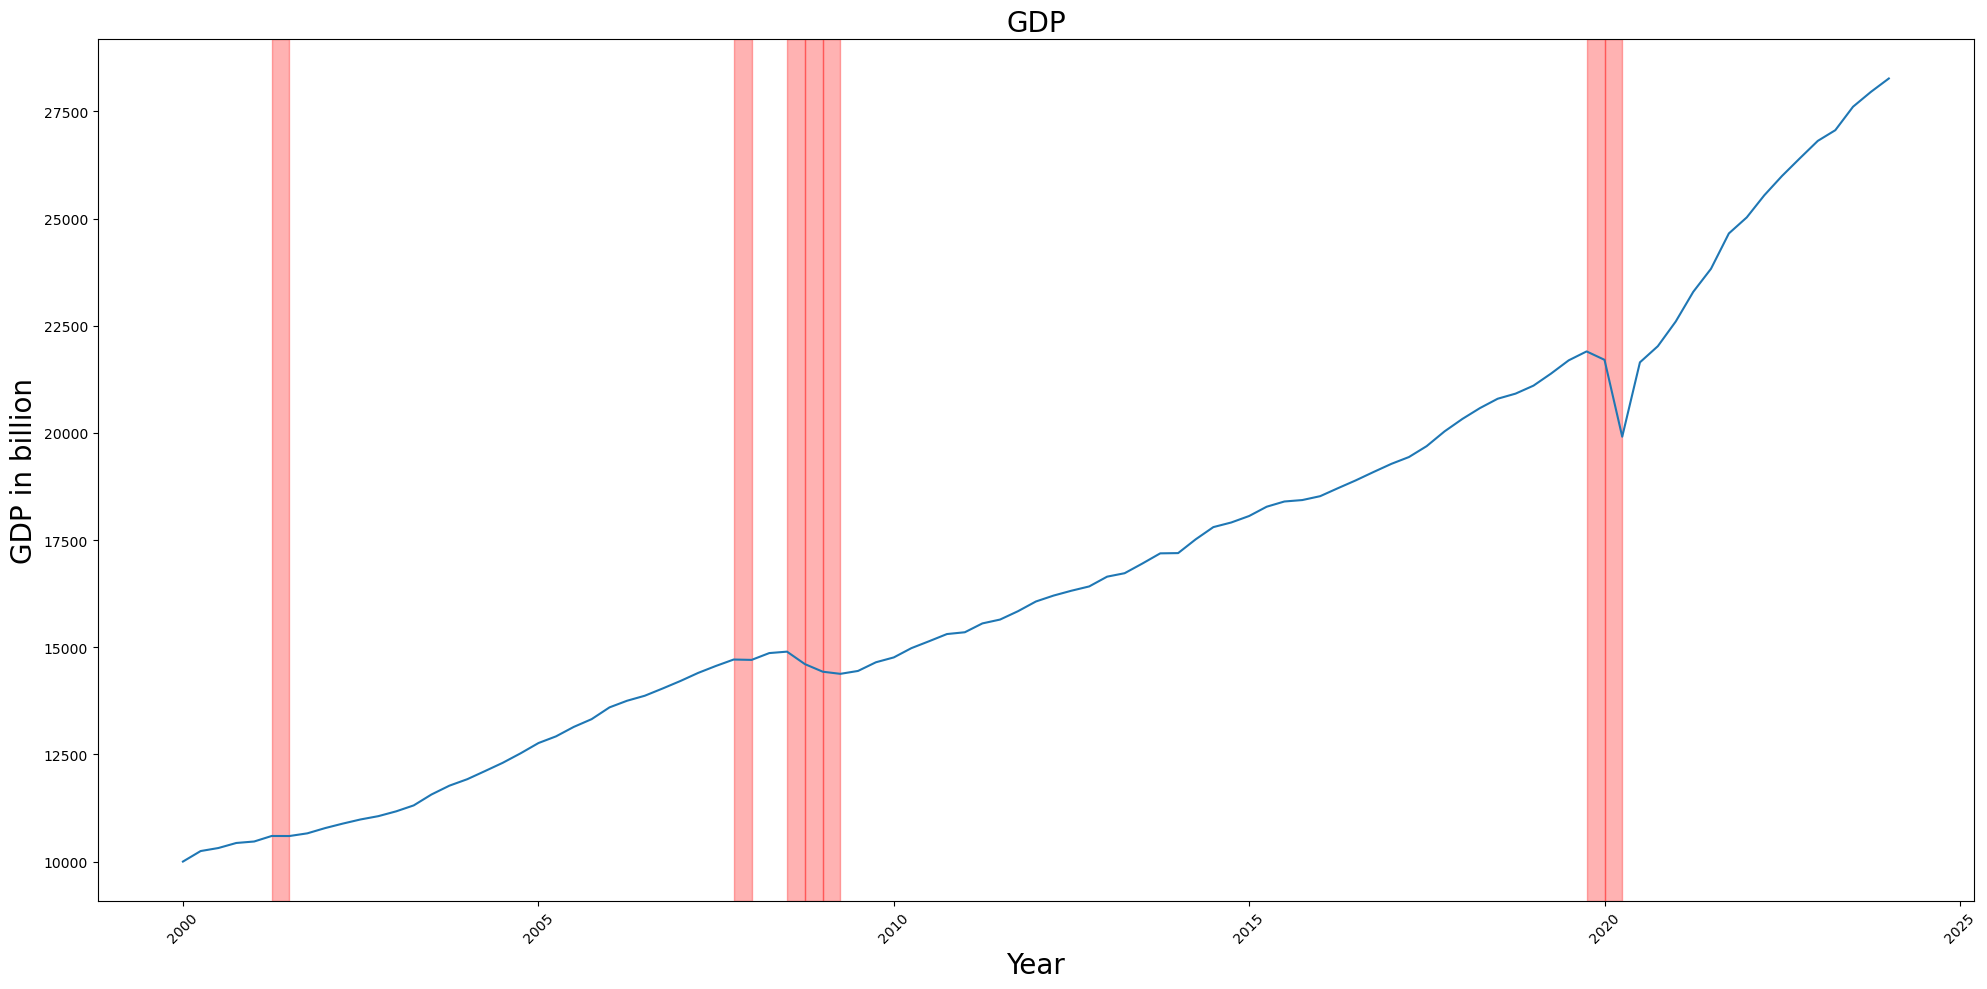

In [58]:
# Need a large figure
fic = plt.subplots(figsize = (20,10))

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

plt.plot(gdp_after2000['DATE'], gdp_after2000['GDP'])

# Highlight decreasing periods
for i in range(len(gdp_after2000) - 1):
    if gdp_after2000['Decrease'].iloc[i]:
        plt.axvspan(gdp_after2000['DATE'].iloc[i], gdp_after2000['DATE'].iloc[i + 1], color='red', alpha=0.3)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('GDP in billion', fontsize = 20)
plt.title('GDP', fontsize = 20)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Possible Reasons for GDP decrease:**

-  911 event
- 2008 crisis
- COVID pandemic

## Combine Interest Rates, GDP and Unemployment Rates:

In [59]:
cmev = pd.concat([finalrates, df_gdp_uner], axis=1)
cmev.head()

,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Date,date,GDP growth,GDP,UNRATE
0,2004,1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN,2004-03-31,2004-03-31,3.1,12112.815,5.600000
1,2004,2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN,2004-06-30,2004-06-30,3.8,12305.307,5.433333
2,2004,3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN,2004-09-30,2004-09-30,4.1,12527.214,5.433333
3,2004,4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN,2004-12-31,2004-12-31,4.5,12767.286,5.300000
4,2005,1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN,2005-03-31,2005-03-31,2.0,12922.656,5.100000


In [60]:
cmev.shape

(83, 20)

In [61]:
Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year,Interest Income per Quarter,Normalized Interest Income per Quarter
0,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-03-31 00:00:00+00:00,5721282.0,68233.0,21389.0,17200.0,41353.0,1,2004,68233.0,0.011926
1,1020180,2002-04-01 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,11.0,2004-06-30 00:00:00+00:00,5870480.0,138086.0,42634.0,35351.0,84535.0,2,2004,69853.0,0.011899
2,1020180,2004-08-23 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,10.0,2004-09-30 00:00:00+00:00,5963700.0,212489.0,65175.0,53242.0,127342.0,3,2004,74403.0,0.012476
3,1020180,2004-08-23 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,10.0,2004-12-31 00:00:00+00:00,6141519.0,291916.0,88839.0,72570.0,172413.0,4,2004,79427.0,0.012933
4,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2020-03-31 00:00:00+00:00,13266052.0,124069.0,23679.0,31259.0,82898.0,1,2020,124069.0,0.009352


In [62]:
Quarterized_dfs.shape

(73843, 15)

In [63]:
# selecting some columns of Quater
small_Quaterized_dfs = Quarterized_dfs[['RSSD ID', 'Firm Legal Name', 'Total Assets', 'Reporting Date', 'Year', 'Quarter',
                                        'Normalized Interest Income per Quarter']] # Delete 'Bank Count'
small_Quaterized_dfs.head()

,RSSD ID,Firm Legal Name,Total Assets,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,5721282.0,2004-03-31 00:00:00+00:00,2004,1,0.011926
1,1020180,BREMER FINANCIAL CORPORATION,5870480.0,2004-06-30 00:00:00+00:00,2004,2,0.011899
2,1020180,BREMER FINANCIAL CORPORATION,5963700.0,2004-09-30 00:00:00+00:00,2004,3,0.012476
3,1020180,BREMER FINANCIAL CORPORATION,6141519.0,2004-12-31 00:00:00+00:00,2004,4,0.012933
4,1020180,BREMER FINANCIAL CORPORATION,13266052.0,2020-03-31 00:00:00+00:00,2020,1,0.009352


In [64]:
# Localize datetime columns to None
small_Quaterized_dfs.loc[:, 'Reporting Date'] = small_Quaterized_dfs['Reporting Date'].dt.tz_localize(None)
cmev.loc[:, 'date'] = cmev['date'].dt.tz_localize(None)

# Merge the DataFrames
df = small_Quaterized_dfs.merge(cmev, left_on='Reporting Date', right_on='date', how='left')
df.drop(columns=['date'], inplace=True)

# Drop unwanted columns
df.drop(columns=['Year_y', 'Quarter_y'], inplace=True)

# Rename columns
df.rename(columns={'Year_x': 'Year', 'Quarter_x': 'Quarter'}, inplace=True)

df.head()

C:\Users\huang\AppData\Local\Temp\ipykernel_25824\825564309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_Quaterized_dfs.loc[:, 'Reporting Date'] = small_Quaterized_dfs['Reporting Date'].dt.tz_localize(None)
C:\Users\huang\AppData\Local\Temp\ipykernel_25824\825564309.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cmev.loc[:, 'date'] = cmev['date'].dt.tz_localize(None)


,RSSD ID,Firm Legal Name,Total Assets,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,1 Mo,2 Mo,3 Mo,...,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Date,GDP growth,GDP,UNRATE
0,1020180,BREMER FINANCIAL CORPORATION,5721282.0,2004-03-31,2004,1,0.011926,0.909677,NaN,0.933710,...,2.163065,2.980968,3.501452,4.010000,4.877903,NaN,2004-03-31,3.1,12112.815,5.600000
1,1020180,BREMER FINANCIAL CORPORATION,5870480.0,2004-06-30,2004,2,0.011899,0.954516,NaN,1.096129,...,2.971935,3.720968,4.183871,4.597097,5.355645,NaN,2004-06-30,3.8,12305.307,5.433333
2,1020180,BREMER FINANCIAL CORPORATION,5963700.0,2004-09-30,2004,3,0.012476,1.370000,NaN,1.513906,...,2.919531,3.505625,3.922188,4.301406,5.068281,NaN,2004-09-30,4.1,12527.214,5.433333
3,1020180,BREMER FINANCIAL CORPORATION,6141519.0,2004-12-31,2004,4,0.012933,1.841774,NaN,2.047419,...,3.058871,3.493710,3.855000,4.175806,4.874839,NaN,2004-12-31,4.5,12767.286,5.300000
4,1020180,BREMER FINANCIAL CORPORATION,13266052.0,2020-03-31,2020,1,0.009352,1.133871,1.130161,1.104032,...,1.093387,1.144839,1.278548,1.365000,1.700000,1.870806,2020-03-31,-28.0,19913.143,13.000000


In [65]:
df.shape

(73843, 24)

## Modeling:

### Drop and Fill NA values:

In [66]:
df.isna().sum()

RSSD ID                                       0
Firm Legal Name                               0
Total Assets                                  0
Reporting Date                                0
Year                                          0
Quarter                                       0
Normalized Interest Income per Quarter        0
1 Mo                                        387
2 Mo                                      66265
3 Mo                                        387
4 Mo                                      71966
6 Mo                                        387
1 Yr                                        387
2 Yr                                        387
3 Yr                                        387
5 Yr                                        387
7 Yr                                        387
10 Yr                                       387
20 Yr                                       387
30 Yr                                     18780
Date                                    

In [67]:
# Extract the 'Normalized Interest Income per Quarter' column
normalized_income = df['Normalized Interest Income per Quarter']

# Fill missing values with the mean of the column
normalized_income_filled = normalized_income.fillna(normalized_income.mean())

# Update the original DataFrame
df['Normalized Interest Income per Quarter'] = normalized_income_filled

In [68]:
# Display the number of missing values per column
missing_values = df.isnull().sum()
# Sort the columns by the number of missing values (ascending order)
sorted_missing_values = missing_values.sort_values()
print(sorted_missing_values)

RSSD ID                                       0
Firm Legal Name                               0
Total Assets                                  0
Reporting Date                                0
Year                                          0
Quarter                                       0
Normalized Interest Income per Quarter        0
 GDP growth                                 387
Date                                        387
20 Yr                                       387
10 Yr                                       387
7 Yr                                        387
5 Yr                                        387
3 Yr                                        387
6 Mo                                        387
1 Yr                                        387
GDP                                         387
3 Mo                                        387
1 Mo                                        387
2 Yr                                        387
UNRATE                                  

In [69]:
# Display the number of missing values per column
missing_values = df.isnull().sum()

# Sort the columns by the number of missing values (ascending order)
sorted_missing_values = missing_values.sort_values()

# Filter the DataFrame to include only columns with fewer missing values (e.g., less than a threshold)
# Set a threshold for maximum allowed missing values (e.g., 500)
threshold = 500
filtered_columns = sorted_missing_values[sorted_missing_values <= threshold].index

# Create a new DataFrame with the filtered columns
df = df[filtered_columns].dropna()
df.head()

,RSSD ID,Firm Legal Name,Total Assets,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,GDP growth,Date,20 Yr,...,7 Yr,5 Yr,3 Yr,6 Mo,1 Yr,GDP,3 Mo,1 Mo,2 Yr,UNRATE
0,1020180,BREMER FINANCIAL CORPORATION,5721282.0,2004-03-31,2004,1,0.011926,3.1,2004-03-31,4.877903,...,3.501452,2.980968,2.163065,1.003548,1.221452,12112.815,0.933710,0.909677,1.686613,5.600000
1,1020180,BREMER FINANCIAL CORPORATION,5870480.0,2004-06-30,2004,2,0.011899,3.8,2004-06-30,5.355645,...,4.183871,3.720968,2.971935,1.359677,1.775484,12305.307,1.096129,0.954516,2.454677,5.433333
2,1020180,BREMER FINANCIAL CORPORATION,5963700.0,2004-09-30,2004,3,0.012476,4.1,2004-09-30,5.068281,...,3.922188,3.505625,2.919531,1.788437,2.075000,12527.214,1.513906,1.370000,2.556563,5.433333
3,1020180,BREMER FINANCIAL CORPORATION,6141519.0,2004-12-31,2004,4,0.012933,4.5,2004-12-31,4.874839,...,3.855000,3.493710,3.058871,2.297581,2.472742,12767.286,2.047419,1.841774,2.822419,5.300000
4,1020180,BREMER FINANCIAL CORPORATION,13266052.0,2020-03-31,2020,1,0.009352,-28.0,2020-03-31,1.700000,...,1.278548,1.144839,1.093387,1.097581,1.067742,19913.143,1.104032,1.133871,1.081452,13.000000


In [70]:
df.shape

(73456, 21)

In [71]:
df.isna().sum()

RSSD ID                                   0
Firm Legal Name                           0
Total Assets                              0
Reporting Date                            0
Year                                      0
Quarter                                   0
Normalized Interest Income per Quarter    0
 GDP growth                               0
Date                                      0
20 Yr                                     0
10 Yr                                     0
7 Yr                                      0
5 Yr                                      0
3 Yr                                      0
6 Mo                                      0
1 Yr                                      0
GDP                                       0
3 Mo                                      0
1 Mo                                      0
2 Yr                                      0
UNRATE                                    0
dtype: int64

### Model:

In [72]:
### Target and Predictor Variables

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73456 entries, 0 to 73841
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   RSSD ID                                 73456 non-null  int64         
 1   Firm Legal Name                         73456 non-null  object        
 2   Total Assets                            73456 non-null  float64       
 3   Reporting Date                          73456 non-null  datetime64[ns]
 4   Year                                    73456 non-null  int64         
 5   Quarter                                 73456 non-null  int64         
 6   Normalized Interest Income per Quarter  73456 non-null  float64       
 7    GDP growth                             73456 non-null  float64       
 8   Date                                    73456 non-null  object        
 9   20 Yr                                   73456 non-

In [74]:
X= df[['3 Mo', '1 Yr', '3 Yr', '10 Yr', 'UNRATE', 'GDP']]  # variables

y= df['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 2.4810461036870395e-05
R² Score: 0.18182318697928468
Coefficients: [-2.02337976e-04  2.34483694e-03 -1.79292064e-03  1.14671093e-03
  1.51533248e-04 -2.58272394e-07]
Intercept: 0.011496108800448842


In [75]:
X= df[['3 Mo', '10 Yr', 'UNRATE', 'GDP']]  # variables

y= df['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 2.483778726852562e-05
R² Score: 0.1809220473715074
Coefficients: [ 9.84051691e-04  5.09210207e-04  2.09771291e-04 -2.63009541e-07]
Intercept: 0.011714950758659888


In [76]:
X= df[['3 Mo']]  # variables

y= df['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 2.6874917792165953e-05
R² Score: 0.11374341022073609
Coefficients: [0.00114971]
Intercept: 0.010116490018621197


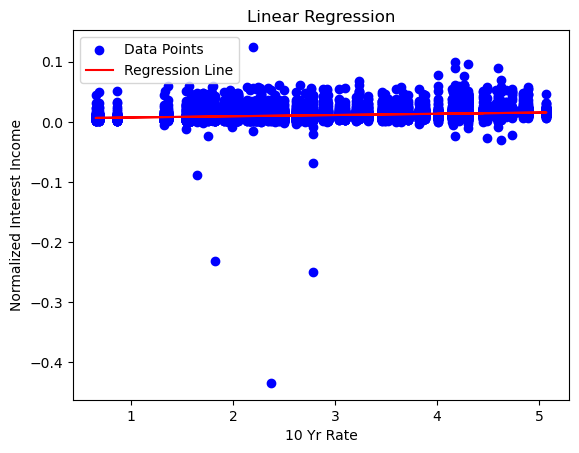

Mean Squared Error: 2.565327419895504e-05
R² Score: 0.15402966126037254
Coefficients: [0.00204706]
Intercept: 0.0051816404175308115


In [77]:
X= df[['10 Yr']]  # variables

y= df['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Regression y
y_reg = model.predict(X)

# Plot the data
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, y_reg, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('10 Yr Rate')
plt.ylabel('Normalized Interest Income')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

In [78]:
X= df[['GDP']]  # variables

y= df['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 2.780817959862116e-05
R² Score: 0.08296715139246424
Coefficients: [-4.38609544e-07]
Intercept: 0.01897663964419612


In [79]:
X= df[[' GDP growth']]  # variables

y= df['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 3.0289594243816735e-05
R² Score: 0.0011373166638009025
Coefficients: [-5.38799811e-05]
Intercept: 0.011953644867129559


# Regression tree

In [80]:
#Making Lagged Variable for Normalized Interest Income

new_dfs = []
for i in df['RSSD ID'].unique():
  new_df_i = df.loc[df['RSSD ID']==i,:]
  for j in df['Year'].unique():
    new_df_i_j = new_df_i.loc[new_df_i['Year']==j,:]
    new_df_i_j = new_df_i_j.sort_values('Quarter')
    new_df_i_j["Lagged Income"] = new_df_i_j['Normalized Interest Income per Quarter'].shift(1)
    new_dfs.append(new_df_i_j)

df_lag = pd.concat(new_dfs, ignore_index=True)
df_lag.head()

#Making a large bank variable
new_dfs = []

for i in df_lag['Quarter'].unique():
  new_df_i = df_lag.loc[df_lag['Quarter']==i,:]
  for j in df_lag['Year'].unique():
    new_df_i_j = new_df_i.loc[new_df_i['Year']==j,:]
    new_df_i_j['Large Bank'] = (new_df_i_j['Total Assets'] > new_df_i_j['Total Assets'].mean())
    new_dfs.append(new_df_i_j)

df_final = pd.concat(new_dfs, ignore_index=True)
df_final.head()

#Chek number of NA values
df_final.isna().sum()

#Drop NA values
df_final.dropna()

C:\Users\huang\AppData\Local\Temp\ipykernel_25824\1281629510.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_i_j['Large Bank'] = (new_df_i_j['Total Assets'] > new_df_i_j['Total Assets'].mean())
C:\Users\huang\AppData\Local\Temp\ipykernel_25824\1281629510.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_i_j['Large Bank'] = (new_df_i_j['Total Assets'] > new_df_i_j['Total Assets'].mean())
C:\Users\huang\AppData\Local\Temp\ipykernel_25824\1281629510.py:22: SettingWithCopyWarning: 
A value

,RSSD ID,Firm Legal Name,Total Assets,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,GDP growth,Date,20 Yr,...,3 Yr,6 Mo,1 Yr,GDP,3 Mo,1 Mo,2 Yr,UNRATE,Lagged Income,Large Bank
18630,1020180,BREMER FINANCIAL CORPORATION,5870480.0,2004-06-30,2004,2,0.011899,3.8,2004-06-30,5.355645,...,2.971935,1.359677,1.775484,12305.307,1.096129,0.954516,2.454677,5.433333,0.011926,False
18631,1020201,HSBC USA INC.,112790755.0,2004-06-30,2004,2,0.008371,3.8,2004-06-30,5.355645,...,2.971935,1.359677,1.775484,12305.307,1.096129,0.954516,2.454677,5.433333,0.008615,True
18632,1020340,"HARRIS BANKCORP, INC.",32604234.0,2004-06-30,2004,2,0.008764,3.8,2004-06-30,5.355645,...,2.971935,1.359677,1.775484,12305.307,1.096129,0.954516,2.454677,5.433333,0.008549,True
18633,1020395,SOUTHERN NATIONAL CORPORATION,217775.0,2004-06-30,2004,2,0.013661,3.8,2004-06-30,5.355645,...,2.971935,1.359677,1.775484,12305.307,1.096129,0.954516,2.454677,5.433333,0.013699,False
18634,1020582,"WCN BANCORP, INC.",244040.0,2004-06-30,2004,2,0.011047,3.8,2004-06-30,5.355645,...,2.971935,1.359677,1.775484,12305.307,1.096129,0.954516,2.454677,5.433333,0.011195,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73447,3687046,COMMUNITY BANKERS TRUST CORPORATION,1030106.0,2008-12-31,2008,4,0.009638,-4.5,2008-12-31,3.946290,...,1.480968,0.740968,0.989194,14430.902,0.327627,0.141290,1.215484,8.266667,0.013625,False
73448,3695957,ENB FINANCIAL CORP,688423.0,2008-12-31,2008,4,0.012569,-4.5,2008-12-31,3.946290,...,1.480968,0.740968,0.989194,14430.902,0.327627,0.141290,1.215484,8.266667,0.013000,False
73449,3715257,1ST FINANCIAL SERVICES CORPORATION,707136.0,2008-12-31,2008,4,0.013078,-4.5,2008-12-31,3.946290,...,1.480968,0.740968,0.989194,14430.902,0.327627,0.141290,1.215484,8.266667,0.014210,False
73450,3719965,NATIONAL AMERICAS HOLDINGS LLC,4423292.0,2008-12-31,2008,4,0.013025,-4.5,2008-12-31,3.946290,...,1.480968,0.740968,0.989194,14430.902,0.327627,0.141290,1.215484,8.266667,0.012717,False


In [81]:
X= df_final[['3 Mo', '10 Yr', 'UNRATE', 'Lagged Income', ' GDP growth', 'Total Assets']]  # variables

y= df_final['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train-test splits
print(f'Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}')
X_train.info()

Shape of X_train: (58764, 6), Shape of X_test: (14692, 6)
Shape of y_train: (58764,), Shape of y_test: (14692,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58764 entries, 67538 to 15795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   3 Mo           58764 non-null  float64
 1   10 Yr          58764 non-null  float64
 2   UNRATE         58764 non-null  float64
 3   Lagged Income  43511 non-null  float64
 4    GDP growth    58764 non-null  float64
 5   Total Assets   58764 non-null  float64
dtypes: float64(6)
memory usage: 3.1 MB


In [82]:
# Initialize the regression tree model
reg_tree = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
reg_tree.fit(X_train, y_train)

# Make predictions
y_pred = reg_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.0610856617689092e-05
R² Score: 0.32361829873113024


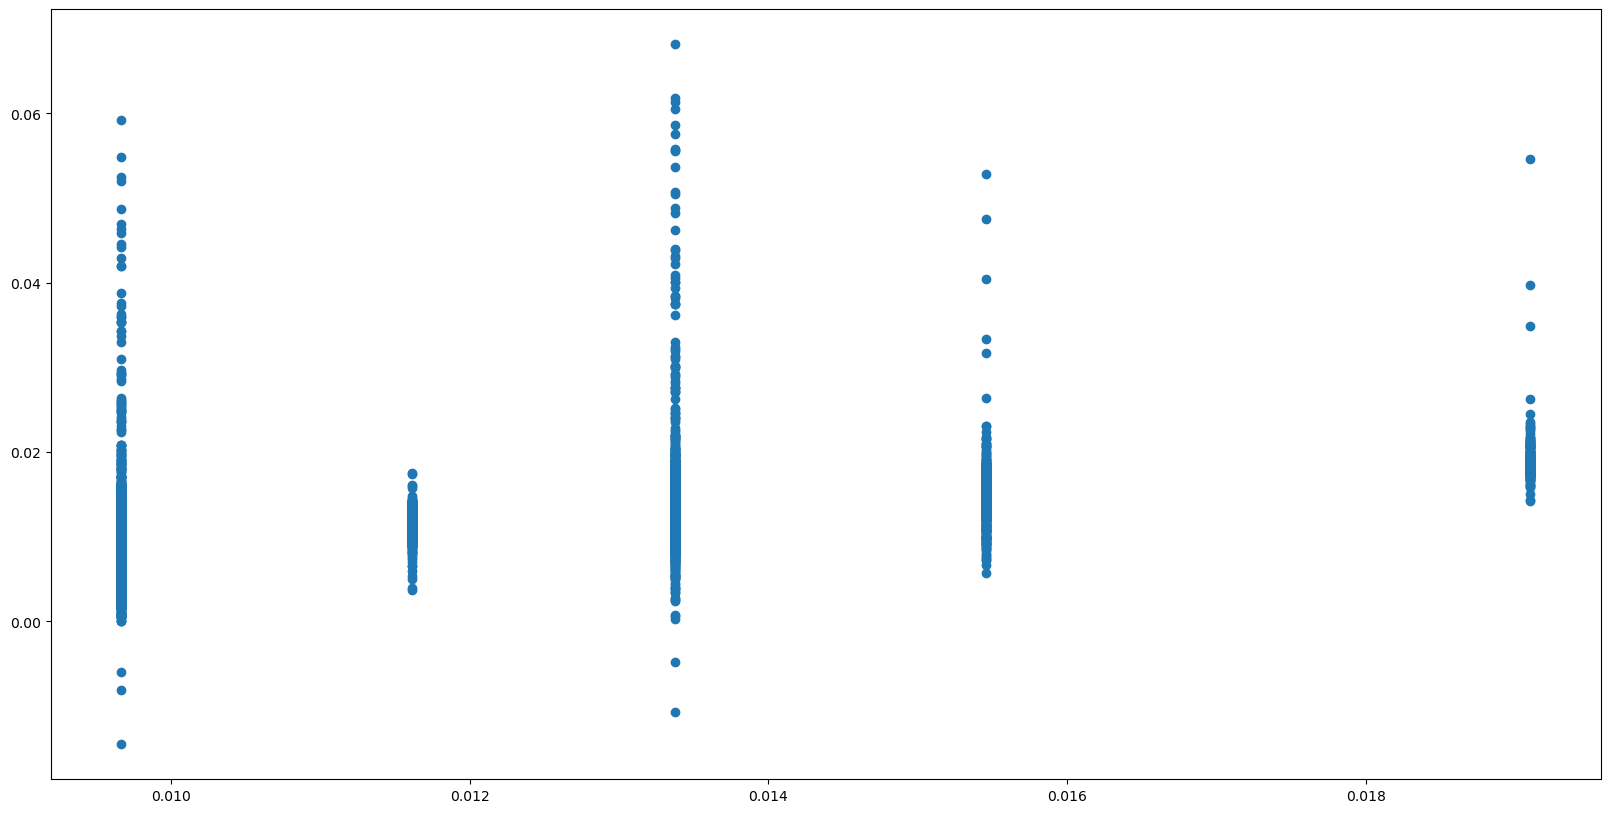

In [83]:
# Plot the regression tree
plt.figure(figsize=(20,10))

plt.scatter(y_pred, y_test)
plt.show()

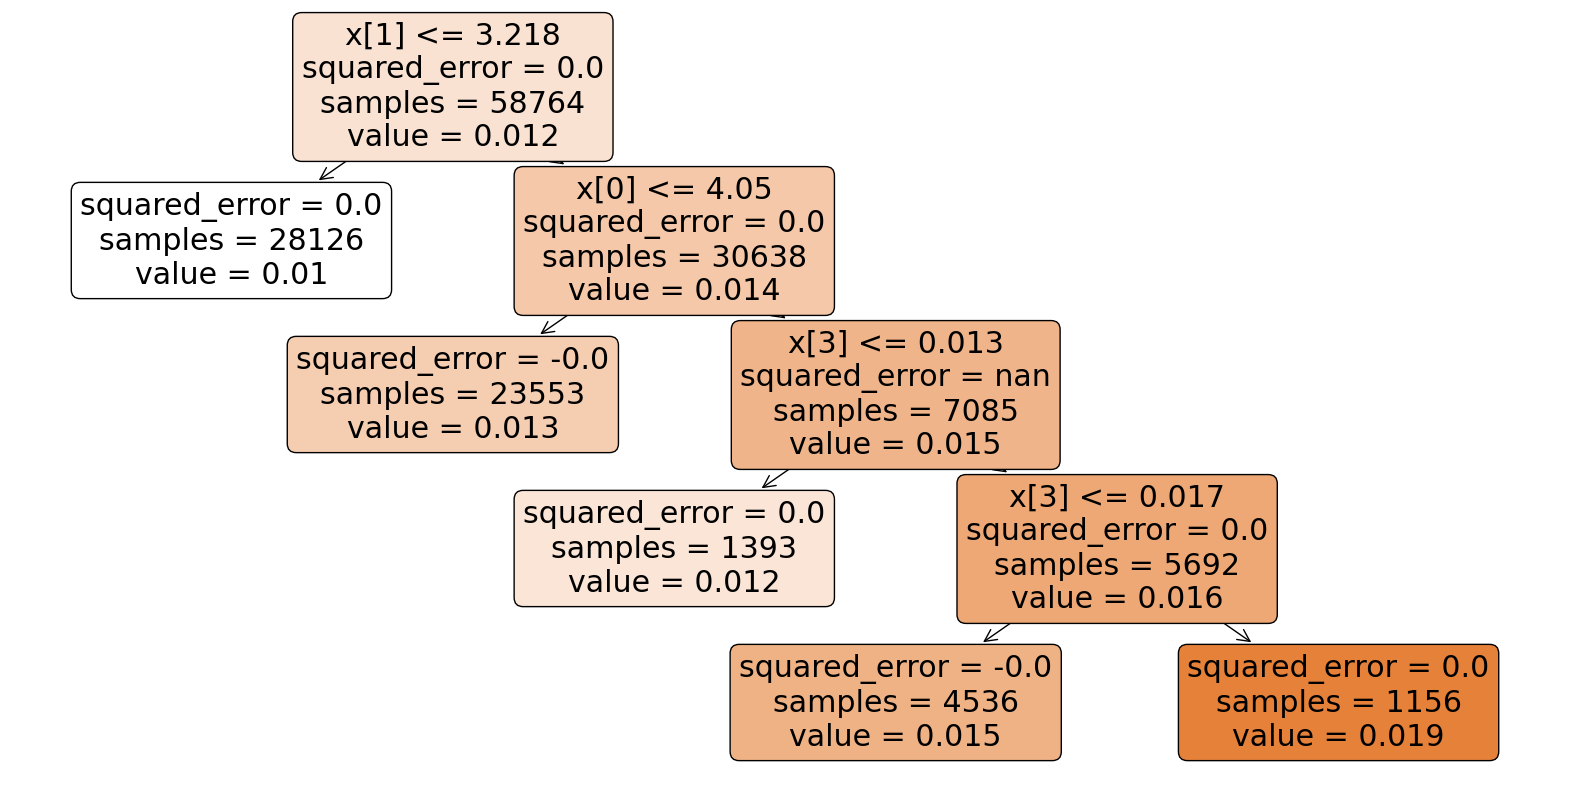

In [84]:
# Plot the regression tree
plt.figure(figsize=(20,10))
# tree.plot_tree(reg_tree, filled=True, rounded=True)
plot_tree(reg_tree, filled=True, rounded=True)
plt.show()

# '3 Mo', '10 Yr', 'UNRATE', 'Lagged Income', ' GDP growth', 'Total Assets'

In [85]:
X= df_final[['3 Mo', '10 Yr', 'UNRATE', 'Lagged Income', 'GDP', 'Total Assets']]  # variables

y= df_final['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train-test splits
print(f'Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}')
X_train.info()

# Initialize the regression tree model
reg_tree = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
reg_tree.fit(X_train, y_train)

# Make predictions
y_pred = reg_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Shape of X_train: (58764, 6), Shape of X_test: (14692, 6)
Shape of y_train: (58764,), Shape of y_test: (14692,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58764 entries, 67538 to 15795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   3 Mo           58764 non-null  float64
 1   10 Yr          58764 non-null  float64
 2   UNRATE         58764 non-null  float64
 3   Lagged Income  43511 non-null  float64
 4   GDP            58764 non-null  float64
 5   Total Assets   58764 non-null  float64
dtypes: float64(6)
memory usage: 3.1 MB
Mean Squared Error: 1.0372702683873463e-05
R² Score: 0.3387992561902624


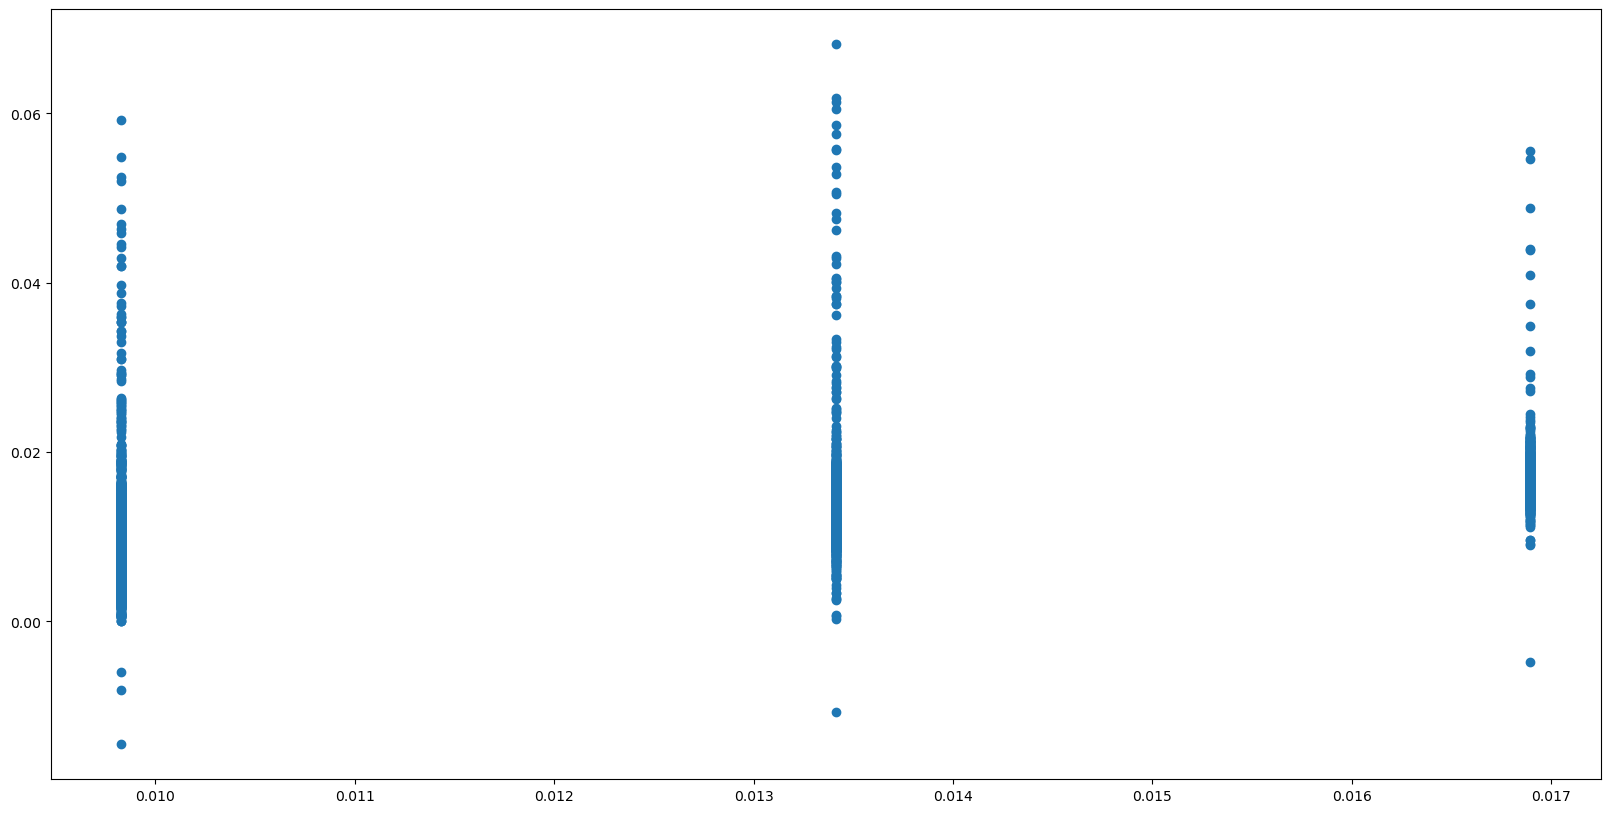

In [86]:
# Plot the regression tree
plt.figure(figsize=(20,10))

plt.scatter(y_pred, y_test)
plt.show()

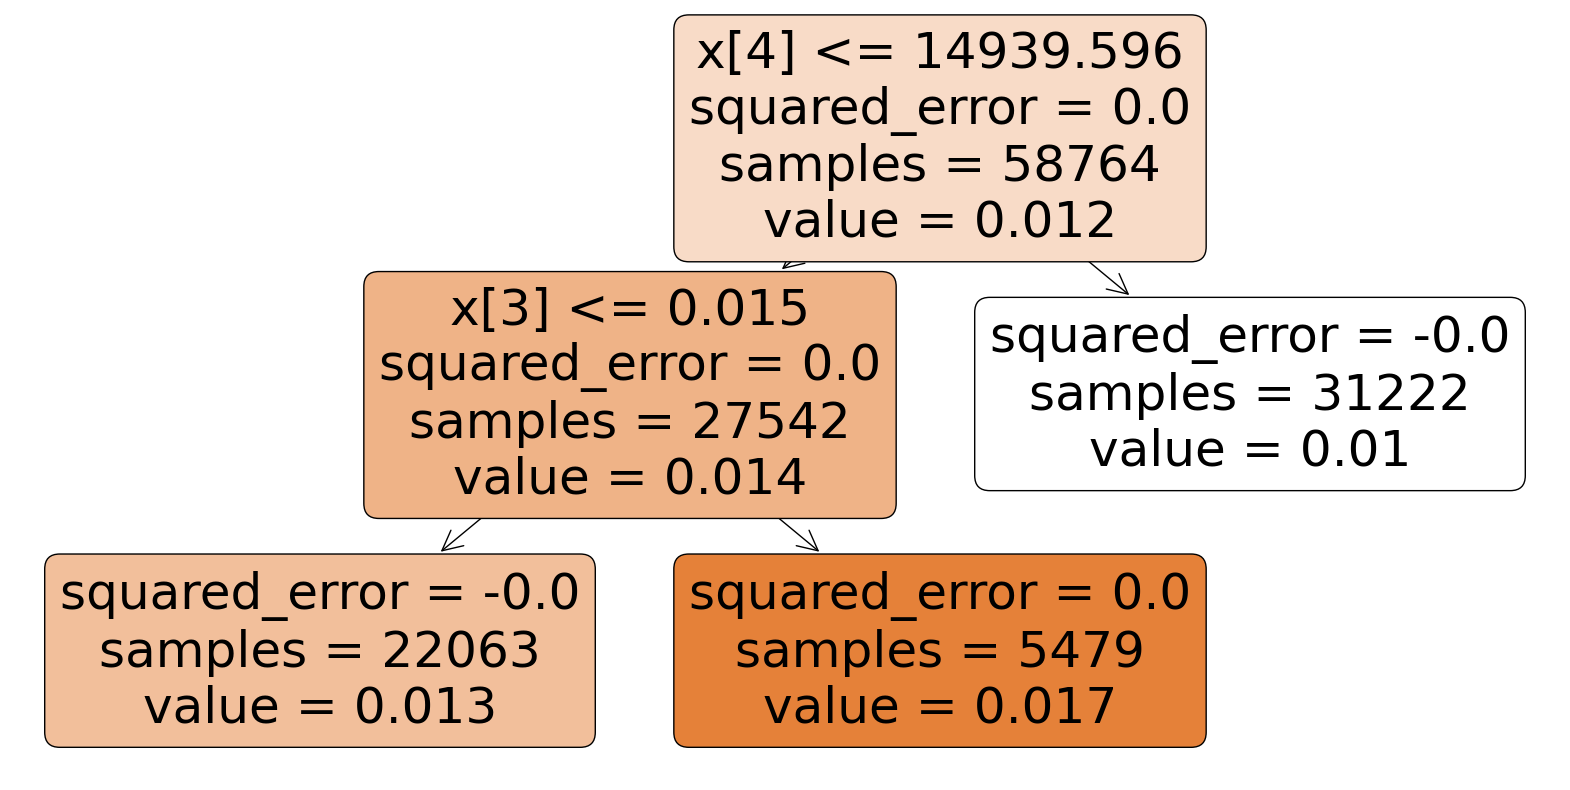

In [87]:
# Plot the regression tree
plt.figure(figsize=(20,10))
# tree.plot_tree(reg_tree, filled=True, rounded=True)
plot_tree(reg_tree, filled=True, rounded=True)
plt.show()

# '3 Mo', '10 Yr', 'UNRATE', 'Lagged Income', 'GDP', 'Total Assets'

In [88]:
X= df_final[['3 Mo', '10 Yr', 'UNRATE', 'Lagged Income', 'GDP', 'Large Bank']]  # variables

y= df_final['Normalized Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train-test splits
print(f'Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}')
X_train.info()

# Initialize the regression tree model
reg_tree = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
reg_tree.fit(X_train, y_train)

# Make predictions
y_pred = reg_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Shape of X_train: (58764, 6), Shape of X_test: (14692, 6)
Shape of y_train: (58764,), Shape of y_test: (14692,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58764 entries, 67538 to 15795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   3 Mo           58764 non-null  float64
 1   10 Yr          58764 non-null  float64
 2   UNRATE         58764 non-null  float64
 3   Lagged Income  43511 non-null  float64
 4   GDP            58764 non-null  float64
 5   Large Bank     58764 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 2.7 MB
Mean Squared Error: 9.790934919960349e-06
R² Score: 0.37588363910831535


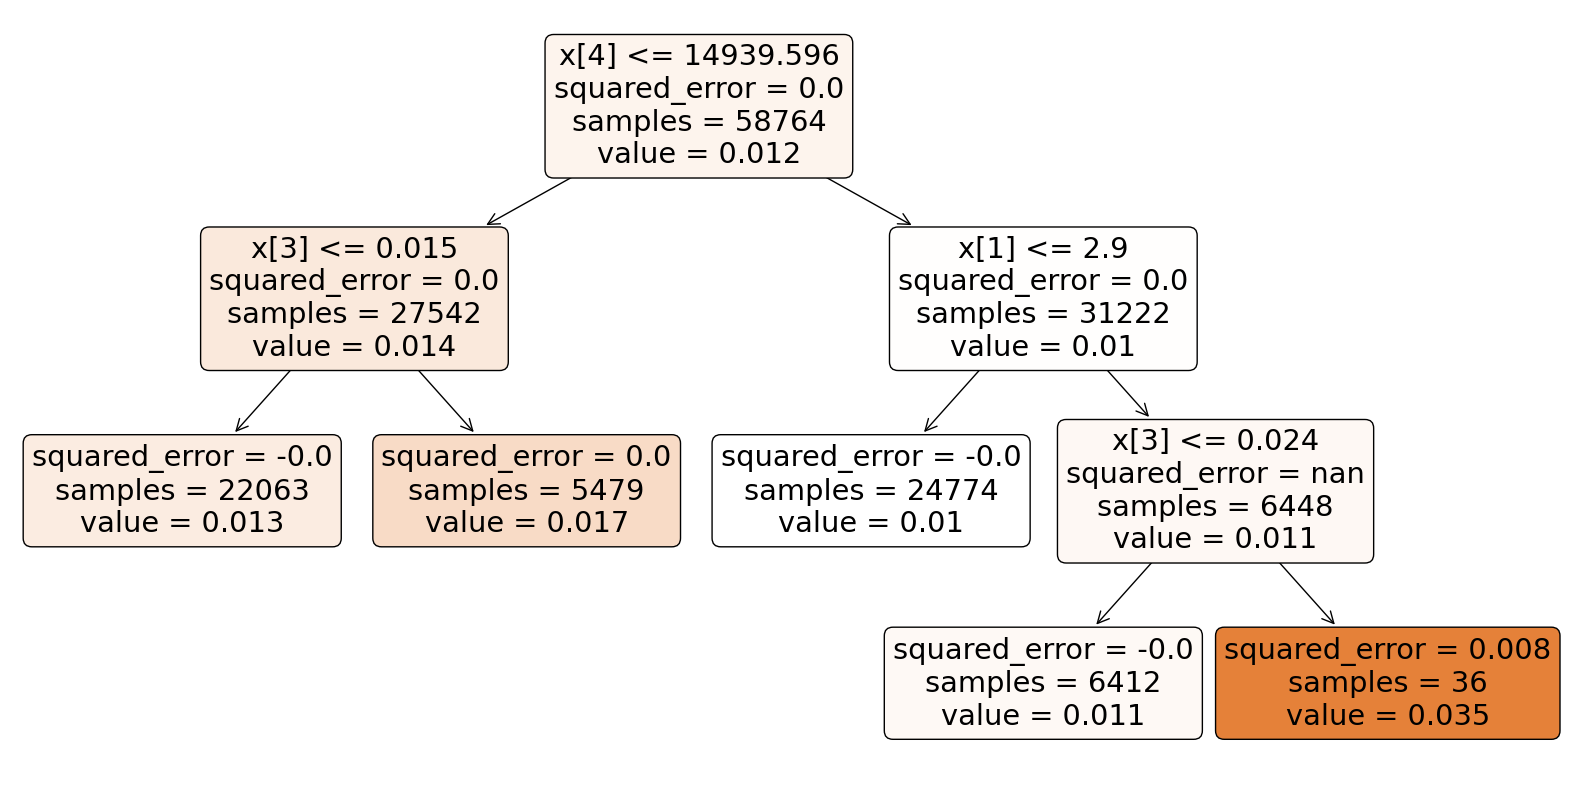

In [89]:
# Plot the regression tree
plt.figure(figsize=(20,10))
# tree.plot_tree(reg_tree, filled=True, rounded=True)
plot_tree(reg_tree, filled=True, rounded=True)
plt.show()

# '3 Mo', '10 Yr', 'UNRATE', 'Lagged Income', 'GDP', 'Large Bank'